In [4]:
!pip install Bio

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from Bio import SeqIO
from Bio.SeqRecord import SeqRecord
from Bio.Seq import Seq
from Bio.Align import MultipleSeqAlignment
from Bio.Align.Applications import ClustalwCommandline
import matplotlib.pyplot as plt
from pickle import TRUE
from Bio import Phylo
from Bio.Phylo.TreeConstruction import DistanceCalculator, DistanceTreeConstructor
from Bio.Phylo.Consensus import *
from Bio.Phylo import write


tabelke csv otrzymałam za pomocą takiego kodu:  makeblastdb -in "my_path"
blastp -query "my_path" -db database_project2.1 -outfmt "6 qseqid sseqid pident length mismatch gapopen qstart qend sstart send evalue bitscore" -out blast_results_protein.txt




In [6]:
blast_df = pd.read_csv('blast_results_protein.csv', sep='\t', header=None,
                           names=["query", "subject", "identity", "length", "mismatch", "gapopen", "qstart", "qend", "sstart", "send", "evalue", "bitscore"])

In [7]:
relevant_cols = ["query", "subject", "identity"]
blast_df = blast_df[relevant_cols]

In [8]:
blast_df.to_csv("blast_df.csv")

In [9]:
blast_df

,query,subject,identity
0,AAC63054.1,AAC63054.1,100.000
1,AAC63054.1,NP_001126851.1,97.432
2,AAC63054.1,XP_055137660.1,96.469
3,AAC63054.1,XP_010369387.1,93.740
4,AAC63054.1,XP_003910009.2,92.857
...,...,...,...
6442,XP_010367395.2,XP_055141125.1,52.941
6443,XP_010367395.2,XP_001089771.2,52.941
6444,XP_010367395.2,XP_010384732.2,52.941
6445,XP_010367395.2,XP_002816321.2,52.941


In [10]:
# Use pivot_table with mean aggregation
similarity_matrix = blast_df.pivot_table(index="query", columns="subject", values="identity", aggfunc="mean").fillna(0)


In [11]:
similarity_matrix.to_csv("similarity_matrix_protein1.csv")

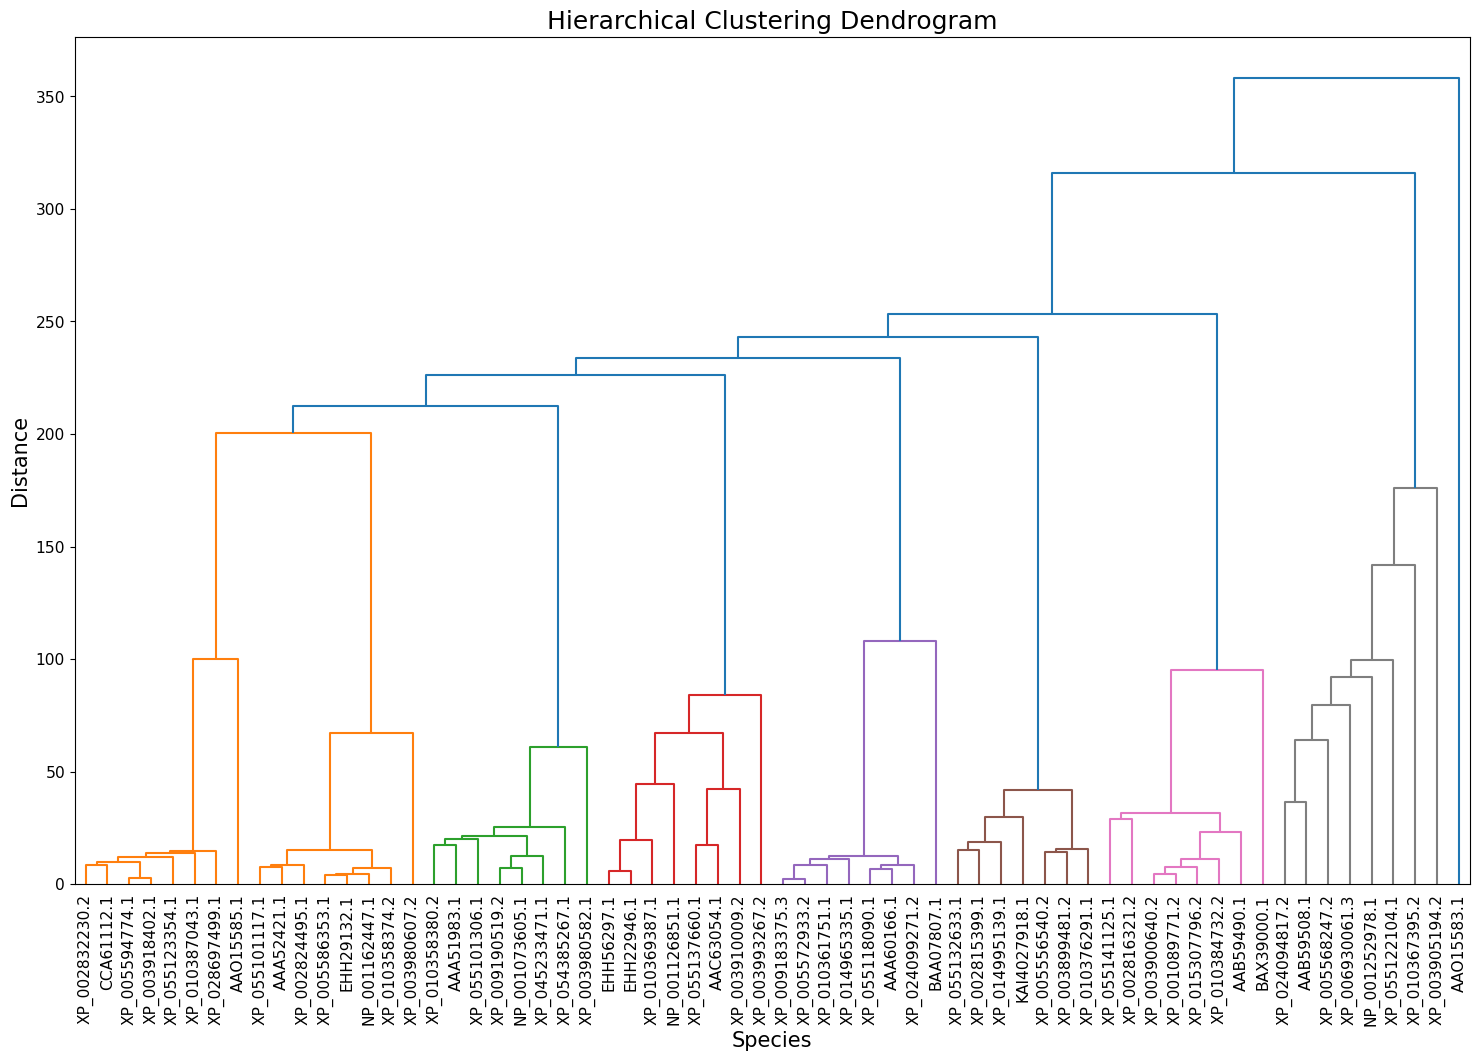

In [12]:
# Perform hierarchical clustering
linkage_matrix = linkage(similarity_matrix, method='average')
flat_clusters = fcluster(linkage_matrix, t=8, criterion='maxclust')

# Dendrogram plot
plt.figure(figsize=(18, 11))
dendrogram(linkage_matrix, labels=similarity_matrix.index, orientation='top', distance_sort='descending', color_threshold = 210)
plt.title('Hierarchical Clustering Dendrogram', fontsize = 18)
plt.xlabel('Species', fontsize = 15)
plt.ylabel('Distance', fontsize = 15)
plt.tick_params(axis='both', which='both', labelsize=11.2)

plt.savefig('Clusters.png', bbox_inches='tight')
plt.show()

In [13]:
labels=similarity_matrix.index
list_of_labels = list(labels)

In [14]:
clust_data = {'id' : list_of_labels,
                'organism': ['H. sapiens', 'H. sapiens', 'H. sapiens', 'H. sapiens','H. sapiens','H. sapiens',
                             'H. sapiens', 'F. catus', 'F.catus', 'F.catus',
                             'H. sapiens','M. mulatta', 'M. mulatta','M. fascicularis',
                             'H. sapiens','M. mulatta', 'P.abelii','P. anubis', 'M. mulatta', 'M. mulatta',
                             'P. abelii', 'P.abelii', 'P. ableii', 'P. abelii', 'P. anubis',
                             'P. anubis','P. anubis', 'P. anubis', 'P. anubis',
                             'F. catus', 'F. catus', 'F. catus', 'M. fascicularis',
                             'M. fascicularis', 'M. fascicularis', 'M. fascicularis', 'M. fascicularis',
                             'F. catus', 'P. anubis', 'P. anubis', 'R. roxellana',
                             'R. roxellana', 'R. roxellana', 'R. roxellana', 'R. roxellana',
                             'R. roxellana', 'R. roxellana', 'R. roxellana', 'M. mulatta',
                             'M. mulatta', 'M. fascicularis', 'P. abelii', 'P. abelii',
                             'M. mulatta', 'M. fascicularis', 'P. abelii', 'S. syndactylus',
                             'S. syndactylus', 'S. syndactylus', 'S. syndactylus',
                             'S. syndactylus', 'S. syndactylus', 'S. syndactylus',
                             'S. syndactylus',],
              'cluster' : list(flat_clusters),
              'protein': ['factor VII', 'factor X', 'protein C', 'factor XII', 'thrombomodulin', 'prothrombin', 'factor XI',
                          'factor IX', 'protein C', 'factor XII', 'factor IX', 'prothrombin', 'factor X', 'prothrombin',
                          'factor XI', 'factor VII', 'prothrombin', 'factor X', 'thrombomodulin', 'factor XII', 'factor XI', 'factor XII', 'factor X', 'factor IX', 'factor XI',
                          'factor XII', 'thrombomodulin', 'prothrombin', 'factor IX', 'factor VII',
                          'factor X', 'prothrombin', 'factor XI', 'thrombomodulin', 'protein C', 'factor X', 'factor IX', 'thrombomodulin',
                          'protein C','factor VII',
                          'factor X', 'factor VII', 'protein C', 'thrombomodulin', 'prothrombin', 'factor XI', 'factor XII', 'factor IX', 'protein C', 'factor XI',  'factor XII', 'thrombomodulin', 'protein C', 'factor IX', 'factor VII', 'factor VII', 'factor X', 'factor VII ', 'protein C',
                           'thrombomodulin', 'factor IX', 'factor XI', 'prothrombin', 'factor XII'],
              'NCBI protein description' : ['factor VII', 'coagulation factor X', 'protein C', 'coagulation factor XII', 'thrombomodulin', 'prothrombin', 'coagulation factor XI, partial',
                                               'coagulation factor IX, partial', 'protein C, partial', 'coagulation factor XII','coagulation factor IX', 'prothrombin', 'coagulation factor X', 'prothrombin',
                                               'coagulation factor XI', 'coagulation factor VII precursor', 'prothrombin precursor', 'coagulation factor X precursor',
                                               'thrombomodulin precursor', 'coagulation factor XII isoform X1', 'coagulation factor XI', 'coagulation factor XII', 'coagulation factor X isoform X1',
                                               'coagulation factor IX isoform X1', 'coagulation factor XI isoform X1', 'coagulation factor XII isoform X3',
                                               'thrombomodulin', 'prothrombin', 'coagulation factor IX isoform X1', 'coagulation factor VII',
                                               'coagulation factor X', 'prothrombin', 'coagulation factor XI isoform X1',
                                               'thrombomodulin', 'vitamin K-dependent protein C isoform X3', 'coagulation factor X', 'coagulation factor IX isoform X1',
                                               'thrombomodulin', 'vitamin K-dependent protein C isoform X2', 'coagulation factor VII isoform X2', 'coagulation factor X',
                                               'coagulation factor VII isoform X5', 'vitamin K-dependent protein C isoform X1', 'thrombomodulin', 'prothrombin isoform X1', 'coagulation factor XI isoform X2', 'coagulation factor XII', 'coagulation factor IX', 'vitamin K-dependent protein C isoform X1', 'coagulation factor XI isoform X2',  'coagulation factor XII isoform X1', 'thrombomodulin', 'vitamin K-dependent protein C isoform X2', 'coagulation factor IX isoform X1', 'LOW QUALITY PROTEIN: coagulation factor VII', 'coagulation factor VII isoform X2', 'coagulation factor X isoform X2', 'LOW QUALITY PROTEIN: coagulation factor VII-like ', 'vitamin K-dependent protein C isoform X4', 'thrombomodulin', 'coagulation factor IX isoform X1', 'coagulation factor XI', 'prothrombin', 'coagulation factor XII']}

In [15]:
a =pd.DataFrame(clust_data)

In [16]:
a

,id,organism,cluster,protein,NCBI protein description
0,AAA51983.1,H. sapiens,6,factor VII,factor VII
1,AAA52421.1,H. sapiens,7,factor X,coagulation factor X
2,AAA60166.1,H. sapiens,4,protein C,protein C
3,AAB59490.1,H. sapiens,2,factor XII,coagulation factor XII
4,AAB59508.1,H. sapiens,1,thrombomodulin,thrombomodulin
...,...,...,...,...,...
59,XP_055122104.1,S. syndactylus,1,thrombomodulin,thrombomodulin
60,XP_055123354.1,S. syndactylus,7,factor IX,coagulation factor IX isoform X1
61,XP_055132633.1,S. syndactylus,3,factor XI,coagulation factor XI
62,XP_055137660.1,S. syndactylus,5,prothrombin,prothrombin


In [ ]:
a.to_csv("baza.csv")

In [51]:
data_all = {'id' : list_of_labels,
                'organism': ['H. sapiens', 'H. sapiens', 'H. sapiens', 'H. sapiens','H. sapiens','H. sapiens',
                             'H. sapiens', 'H. sapiens', 'F.catus', 'F.catus',
                             'H. sapiens','M. mulatta', 'M. mulatta','M. fascicularis',
                             'H. sapiens','M. mulatta', 'P.abelii','P. anubis', 'M. mulatta', 'M. mulatta',
                             'P. abelii', 'P.abelii', 'P. ableii', 'P. abelii', 'P. anubis',
                             'P. anubis','P. anubis', 'P. anubis', 'P. anubis',
                             'F. catus', 'F. catus', 'F. catus', 'M. fascicularis',
                             'M. fascicularis', 'M. fascicularis', 'M. fascicularis', 'M. fascicularis',
                             'F. catus', 'P. anubis', 'P. anubis', 'R. roxellana',
                             'R. roxellana', 'R. roxellana', 'R. roxellana', 'R. roxellana',
                             'R. roxellana', 'R. roxellana', 'R. roxellana', 'M. mulatta',
                             'M. mulatta', 'M. fascicularis', 'P. abelii', 'P. abelii',
                             'M. mulatta', 'M. fascicularis', 'P. abelii', 'S. syndactylus',
                             'S. syndactylus', 'S. syndactylus', 'S. syndactylus',
                             'S. syndactylus', 'S. syndactylus', 'S. syndactylus',
                             'S. syndactylus',],
              'protein': ['factor VII', 'factor X', 'protein C', 'factor XII', 'thrombomodulin', 'prothrombin', 'factor XI',
                          'factor IX', 'protein C', 'factor XII', 'factor IX', 'prothrombin', 'factor X', 'prothrombin',
                          'factor XI', 'factor VII', 'prothrombin', 'factor X', 'thrombomodulin', 'factor XII', 'factor XI', 'factor XII', 'factor X', 'factor IX', 'factor XI',
                          'factor XII', 'thrombomodulin', 'prothrombin', 'factor IX', 'factor VII',
                          'factor X', 'prothrombin', 'factor XI', 'thrombomodulin', 'protein C', 'factor X', 'factor IX', 'thrombomodulin',
                          'protein C','factor VII',
                          'factor X', 'factor VII', 'protein C', 'thrombomodulin', 'prothrombin', 'factor XI', 'factor XII', 'factor IX', 'protein C', 'factor XI',  'factor XII', 'thrombomodulin', 'protein C', 'factor IX', 'factor VII', 'factor VII', 'factor X', 'factor VII ', 'protein C',
                           'thrombomodulin', 'factor IX', 'factor XI', 'prothrombin', 'factor XII'],
              'NCBI protein description' : ['factor VII', 'coagulation factor X', 'protein C', 'coagulation factor XII', 'thrombomodulin', 'prothrombin', 'coagulation factor XI, partial',
                                               'coagulation factor IX, partial', 'protein C, partial', 'coagulation factor XII','coagulation factor IX', 'prothrombin', 'coagulation factor X', 'prothrombin',
                                               'coagulation factor XI', 'coagulation factor VII precursor', 'prothrombin precursor', 'coagulation factor X precursor',
                                               'thrombomodulin precursor', 'coagulation factor XII isoform X1', 'coagulation factor XI', 'coagulation factor XII', 'coagulation factor X isoform X1',
                                               'coagulation factor IX isoform X1', 'coagulation factor XI isoform X1', 'coagulation factor XII isoform X3',
                                               'thrombomodulin', 'prothrombin', 'coagulation factor IX isoform X1', 'coagulation factor VII',
                                               'coagulation factor X', 'prothrombin', 'coagulation factor XI isoform X1',
                                               'thrombomodulin', 'vitamin K-dependent protein C isoform X3', 'coagulation factor X', 'coagulation factor IX isoform X1',
                                               'thrombomodulin', 'vitamin K-dependent protein C isoform X2', 'coagulation factor VII isoform X2', 'coagulation factor X',
                                               'coagulation factor VII isoform X5', 'vitamin K-dependent protein C isoform X1', 'thrombomodulin', 'prothrombin isoform X1', 'coagulation factor XI isoform X2', 'coagulation factor XII', 'coagulation factor IX', 'vitamin K-dependent protein C isoform X1', 'coagulation factor XI isoform X2',  'coagulation factor XII isoform X1', 'thrombomodulin', 'vitamin K-dependent protein C isoform X2', 'coagulation factor IX isoform X1', 'LOW QUALITY PROTEIN: coagulation factor VII', 'coagulation factor VII isoform X2', 'coagulation factor X isoform X2', 'LOW QUALITY PROTEIN: coagulation factor VII-like ', 'vitamin K-dependent protein C isoform X4', 'thrombomodulin', 'coagulation factor IX isoform X1', 'coagulation factor XI', 'prothrombin', 'coagulation factor XII']}

In [58]:
pd.DataFrame(data_all)

,id,organism,protein,NCBI protein description
0,AAA51983.1,H. sapiens,factor VII,factor VII
1,AAA52421.1,H. sapiens,factor X,coagulation factor X
2,AAA60166.1,H. sapiens,protein C,protein C
3,AAB59490.1,H. sapiens,factor XII,coagulation factor XII
4,AAB59508.1,H. sapiens,thrombomodulin,thrombomodulin
...,...,...,...,...
59,XP_055122104.1,S. syndactylus,thrombomodulin,thrombomodulin
60,XP_055123354.1,S. syndactylus,factor IX,coagulation factor IX isoform X1
61,XP_055132633.1,S. syndactylus,factor XI,coagulation factor XI
62,XP_055137660.1,S. syndactylus,prothrombin,prothrombin


In [18]:
def read_your_align(alignment_output):

    # Read the aligned sequences
    aligned_records = list(SeqIO.parse(alignment_output, "clustal"))

    # Construct a MultipleSeqAlignment object
    alignment = MultipleSeqAlignment([SeqRecord(Seq(str(record.seq)), id=record.id, description="") for record in aligned_records])

    return alignment


In [19]:

id_to_organism = {'AAB59490.1': 'H. sapiens', 'XP_055141125.1': 'S. syndactylus', 'XP_002816321.2': 'P. abelii', 'XP_010384732.2': 'R. roxellana',
                  'XP_003900640.2': 'P. anubis', 'XP_015307796.2': 'M. fascicularis',
                  'XP_001089771.2': 'M. mulatta', 'BAX39000.1': 'F. catus'}



In [20]:
data_org = {'id' : ['AAB59490.1', 'XP_055141125.1', 'XP_002816321.2', 'XP_010384732.2', 'XP_003900640.2',
                'XP_015307796.2', 'XP_001089771.2', 'BAX39000.1'],
        'organism' : ['H. sapiens', 'S. syndactylus', 'P. abelii', 'R. roxellana',
                     'P. anubis', 'M. fascicularis', 'M. mulatta', 'F. catus']}

In [21]:
df_results = pd.DataFrame(clust_data)
df_results

,id,organism,cluster,protein,NCBI protein description
0,AAA51983.1,H. sapiens,6,factor VII,factor VII
1,AAA52421.1,H. sapiens,7,factor X,coagulation factor X
2,AAA60166.1,H. sapiens,4,protein C,protein C
3,AAB59490.1,H. sapiens,2,factor XII,coagulation factor XII
4,AAB59508.1,H. sapiens,1,thrombomodulin,thrombomodulin
...,...,...,...,...,...
59,XP_055122104.1,S. syndactylus,1,thrombomodulin,thrombomodulin
60,XP_055123354.1,S. syndactylus,7,factor IX,coagulation factor IX isoform X1
61,XP_055132633.1,S. syndactylus,3,factor XI,coagulation factor XI
62,XP_055137660.1,S. syndactylus,5,prothrombin,prothrombin


In [22]:
df = pd.DataFrame(data_org)
df

,id,organism
0,AAB59490.1,H. sapiens
1,XP_055141125.1,S. syndactylus
2,XP_002816321.2,P. abelii
3,XP_010384732.2,R. roxellana
4,XP_003900640.2,P. anubis
5,XP_015307796.2,M. fascicularis
6,XP_001089771.2,M. mulatta
7,BAX39000.1,F. catus


Clusters:

In [24]:
cluster_trees = []

for i in range(1, 8):  # Assuming 8 clusters
    cluster_samples = f'cluster{i}.aln'
    cluster_alignment = read_your_align(cluster_samples)
    calculator = DistanceCalculator('identity')
    dm = calculator.get_distance(cluster_alignment)
    constructor = DistanceTreeConstructor()
    tree = constructor.upgma(dm)
    cluster_trees.append(tree)


<Figure size 1800x2600 with 0 Axes>

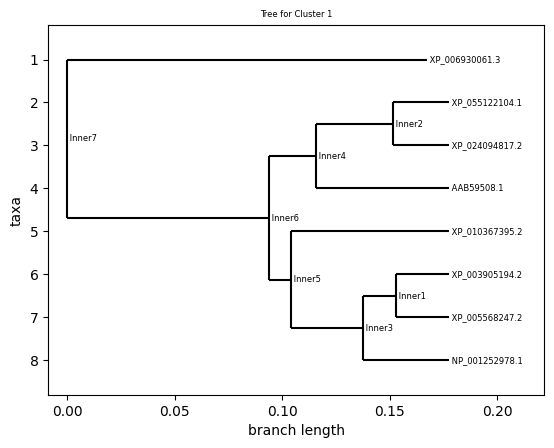

<Figure size 1800x2600 with 0 Axes>

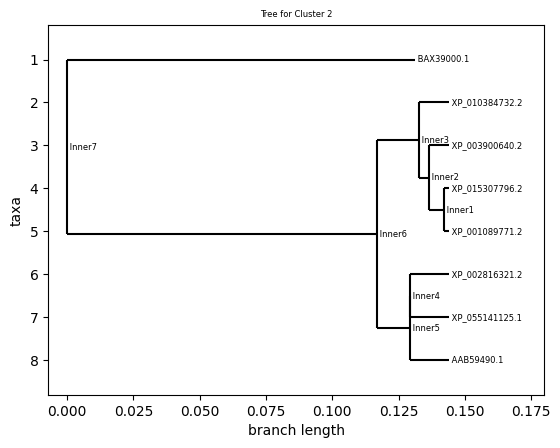

<Figure size 1800x2600 with 0 Axes>

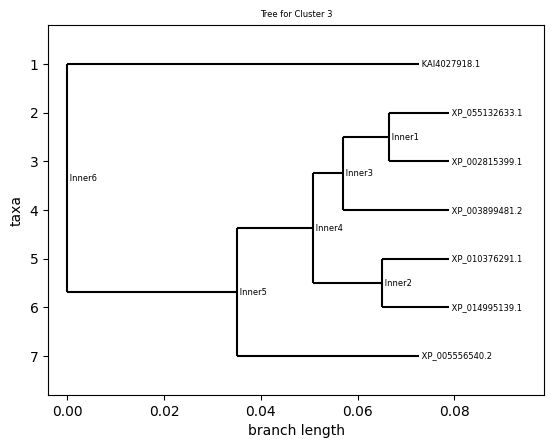

<Figure size 1800x2600 with 0 Axes>

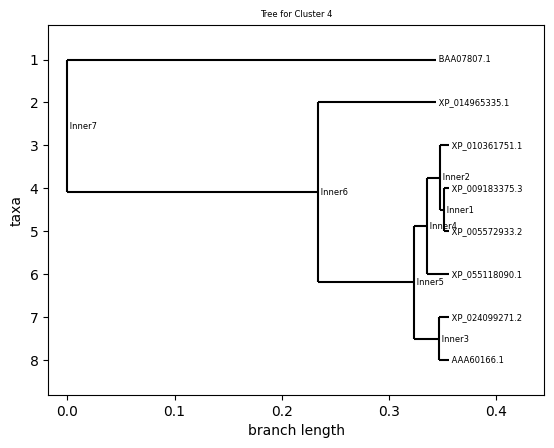

<Figure size 1800x2600 with 0 Axes>

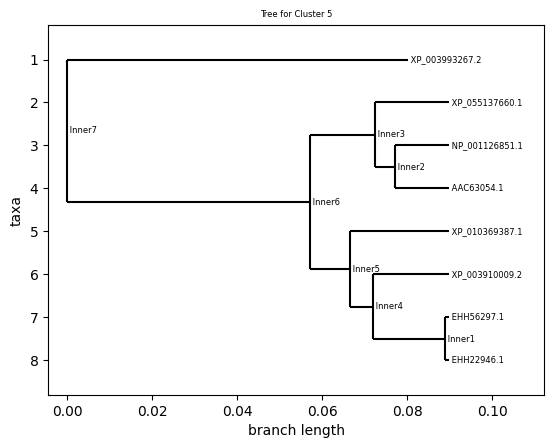

<Figure size 1800x2600 with 0 Axes>

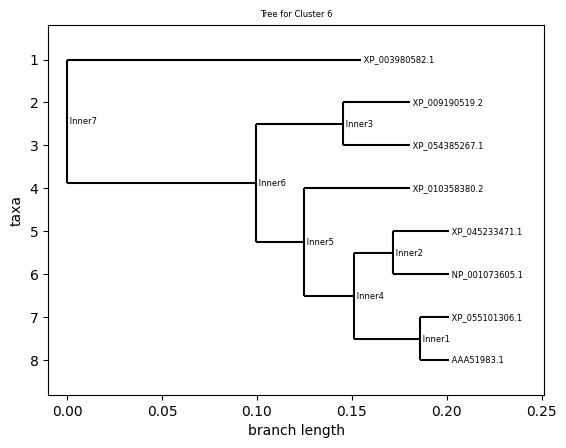

<Figure size 1800x2600 with 0 Axes>

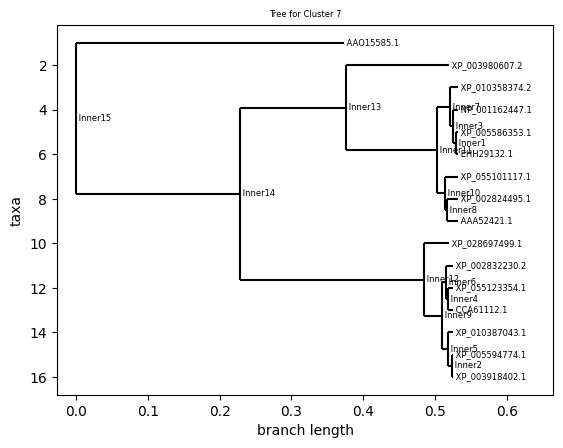

In [25]:
# Visualize each tree
for i, tree in enumerate(cluster_trees, start=1):
    plt.figure(figsize=(18, 26))
    Phylo.draw(tree, do_show=False)
    plt.title(f'Tree for Cluster {i}')
    for label in plt.gca().get_children():
        if isinstance(label, plt.Text):
          label.set_fontsize(6)
    filename = f'tree_cluster_{i}.png'
    plt.savefig(filename)
    plt.show()
    plt.close()

Groups:

In [39]:


protein_groups = ['thrombomodulin.aln', 'coagulation_factor_IX.aln', 'coagulation_factor_XII.aln',
                  'czynnik__krzepniecia_.aln', 'czynnik_krzepniecia_XI.aln', 'factor_VII.aln',
                  'protein_c.aln', 'prothrombin.aln']

group_trees = []
for protein_file in protein_groups:
    alignment = read_your_align(protein_file)
    calculator = DistanceCalculator('identity')
    dm = calculator.get_distance(alignment)
    constructor = DistanceTreeConstructor()
    tree = constructor.upgma(dm)
    group_trees.append(tree)

<Figure size 1800x2000 with 0 Axes>

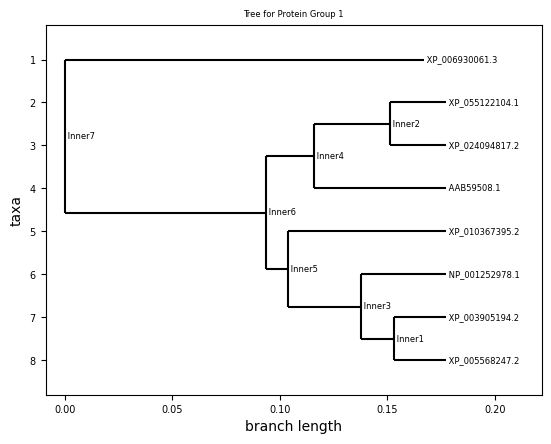

<Figure size 1800x2000 with 0 Axes>

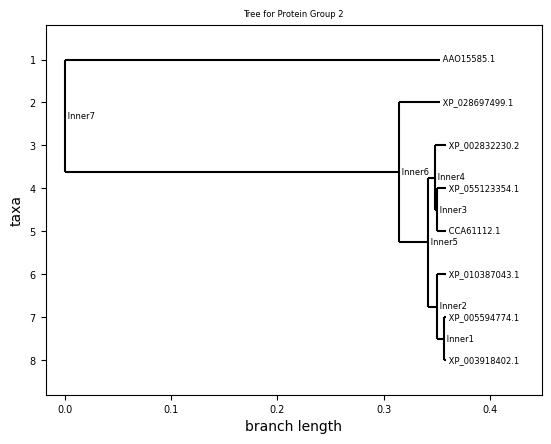

<Figure size 1800x2000 with 0 Axes>

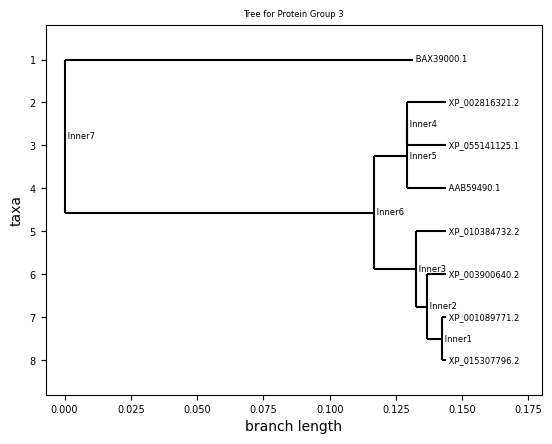

<Figure size 1800x2000 with 0 Axes>

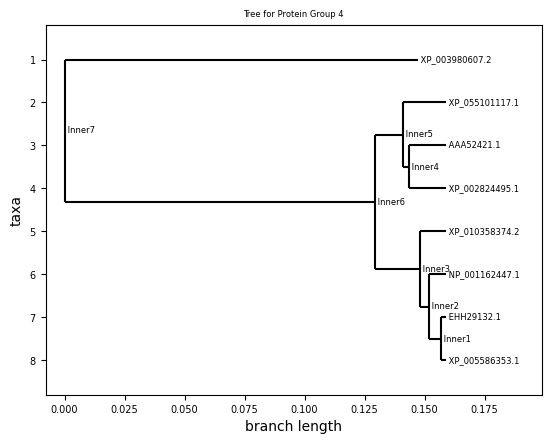

<Figure size 1800x2000 with 0 Axes>

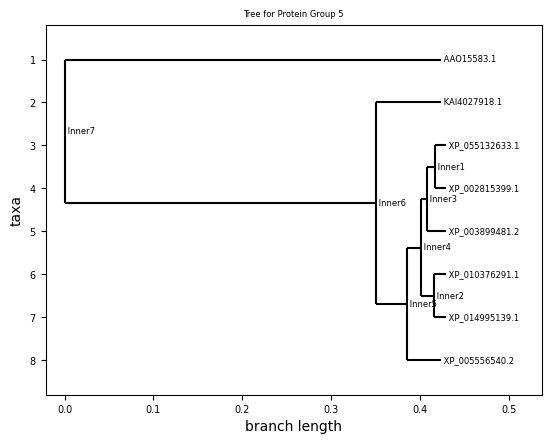

<Figure size 1800x2000 with 0 Axes>

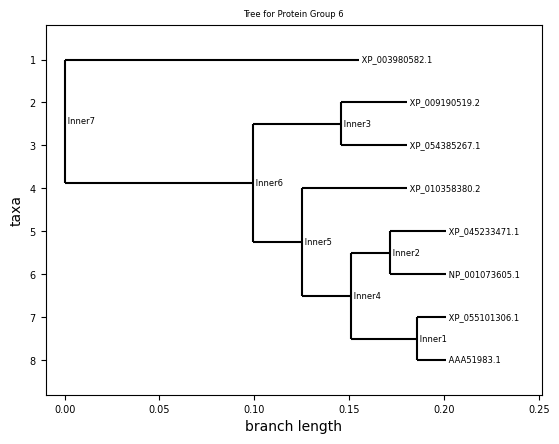

<Figure size 1800x2000 with 0 Axes>

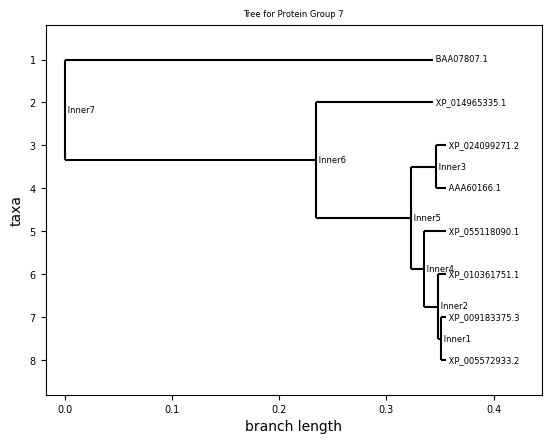

<Figure size 1800x2000 with 0 Axes>

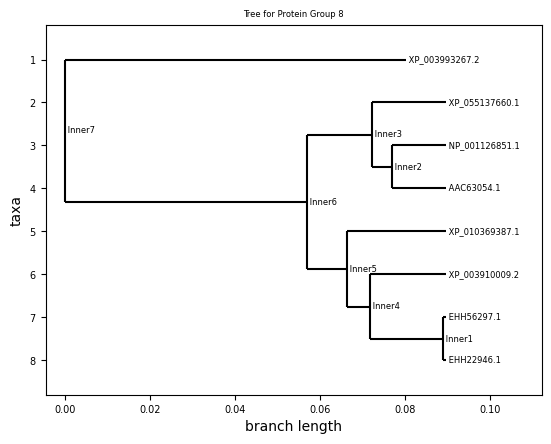

In [40]:
from pickle import TRUE
from Bio import Phylo

# Visualize each tree
for i, tree in enumerate(group_trees, start=1):
    plt.figure(figsize=(18, 20))
    Phylo.draw(tree, do_show=False)
    plt.title(f'Tree for Protein Group {i}', fontsize = 16)
    plt.xticks(fontsize=7)
    plt.yticks(fontsize=7)
    for label in plt.gca().get_children():
      if isinstance(label, plt.Text):
        label.set_fontsize(6)
    filename = f'tree_protein_group_{i}.png'
    plt.show()
    plt.savefig(filename)
    plt.close()

One common tree

In [41]:
protein = ['proteins_project2.aln']

protein_tree = []
for protein_file in protein:
    alignment = read_your_align(protein_file)
    calculator = DistanceCalculator('identity')
    dm = calculator.get_distance(alignment)
    constructor = DistanceTreeConstructor()
    tree = constructor.upgma(dm)
    group_trees.append(tree)



In [42]:
for i, tree in enumerate(protein_tree, start=1):
    plt.figure(figsize=(18, 26))
    Phylo.draw(tree, do_show=False)
    plt.title(f'Tree for all proteins')
    for label in plt.gca().get_children():
        if isinstance(label, plt.Text):
          label.set_fontsize(6)
    filename = f'protein_tree.png'
    plt.savefig(filename)
    plt.show()
    plt.close()

Exercise 2:

In [43]:
#a II
cluster_trees = []

for i in range(1, 8):  # Assuming 8 clusters
    cluster_samples = f'cluster{i}.aln'
    cluster_alignment = read_your_align(cluster_samples)
    calculator = DistanceCalculator('identity')
    dm = calculator.get_distance(cluster_alignment)
    constructor = DistanceTreeConstructor()
    tree = constructor.upgma(dm)
    cluster_trees.append(tree)

from pickle import TRUE
from Bio import Phylo

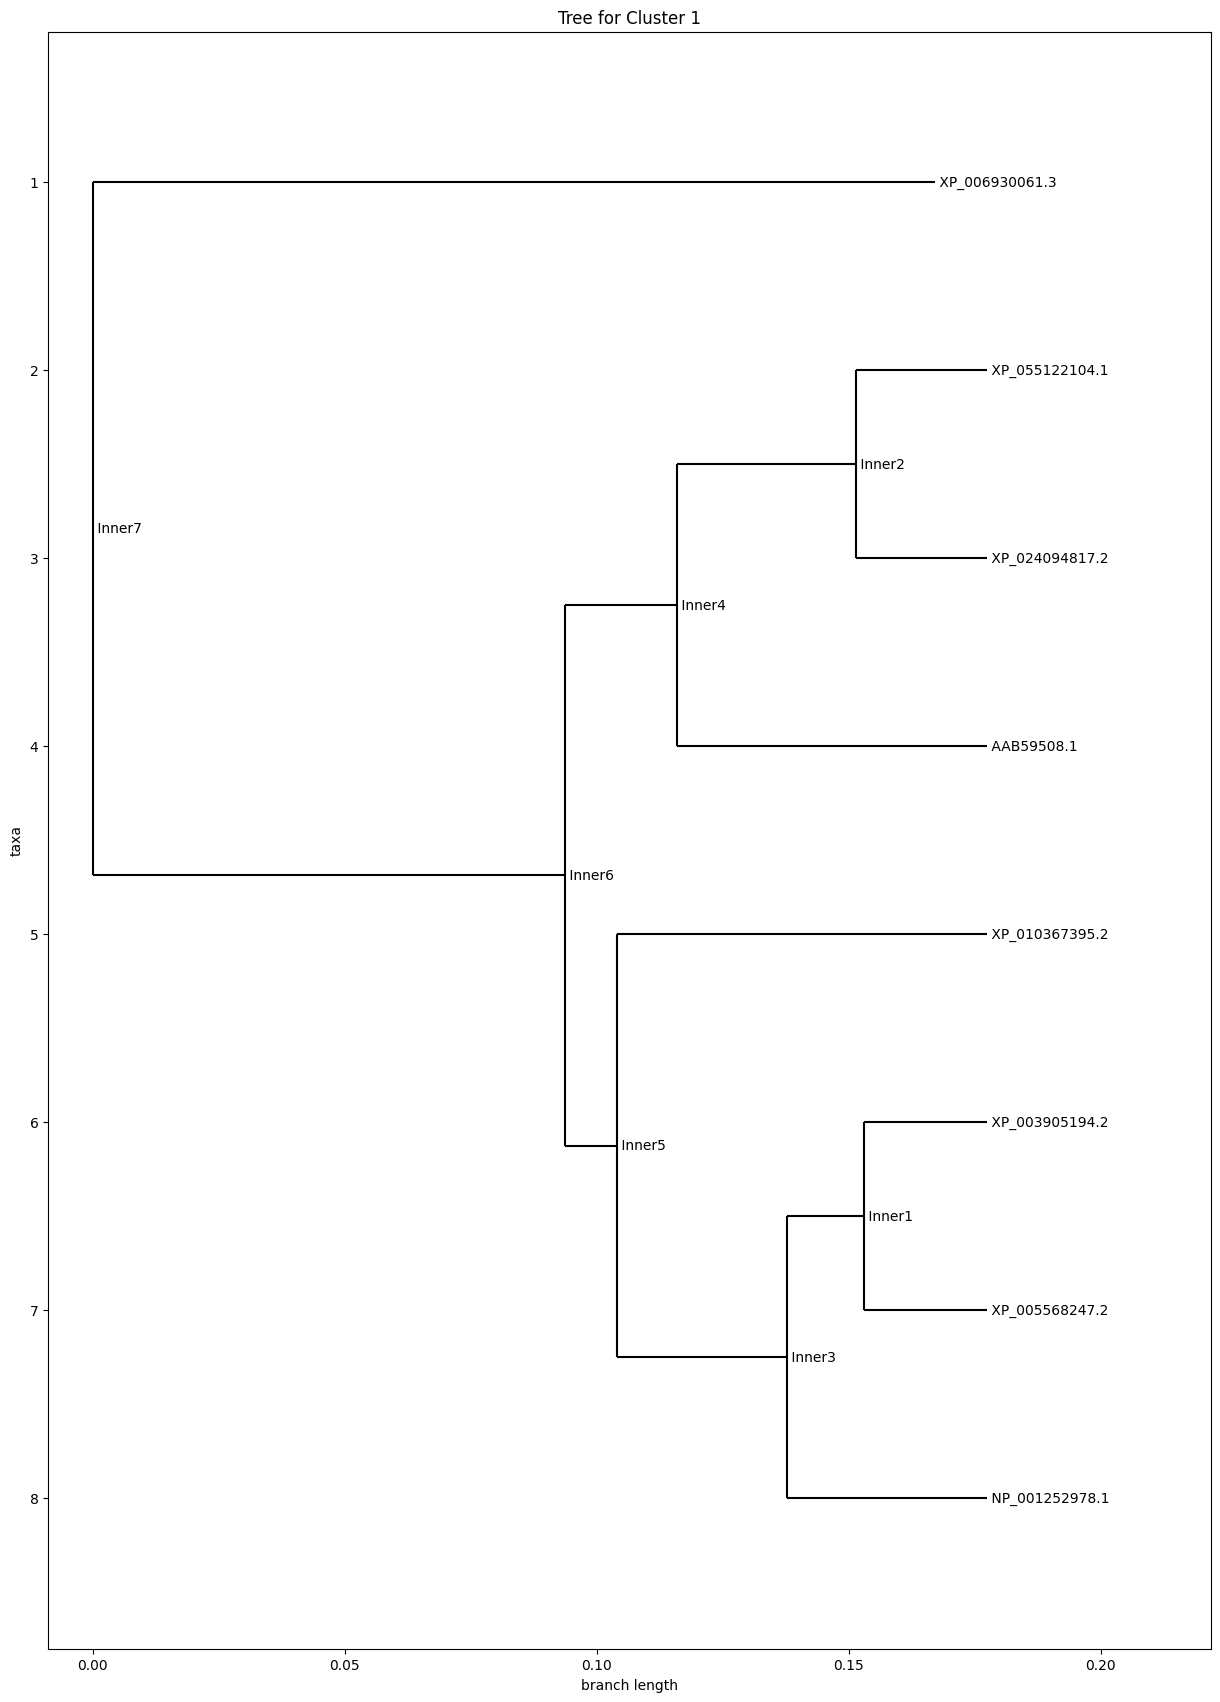

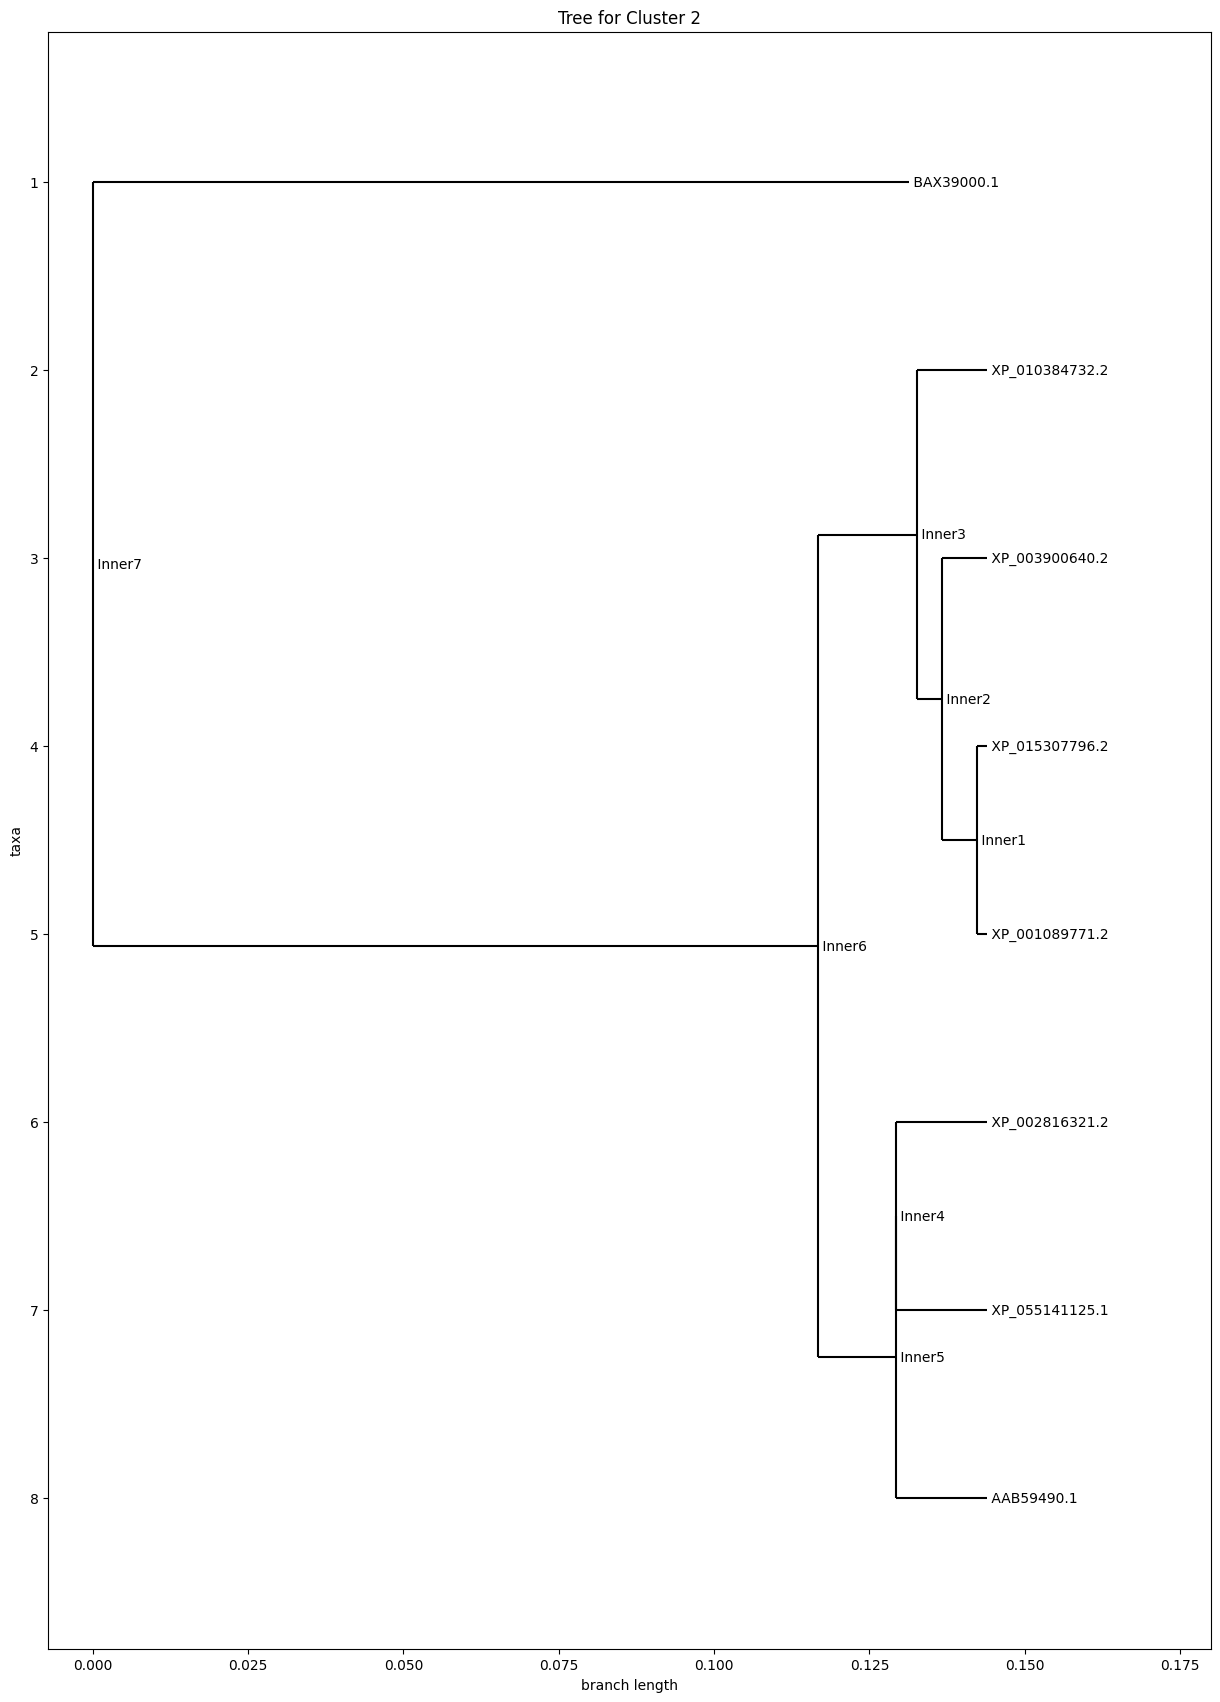

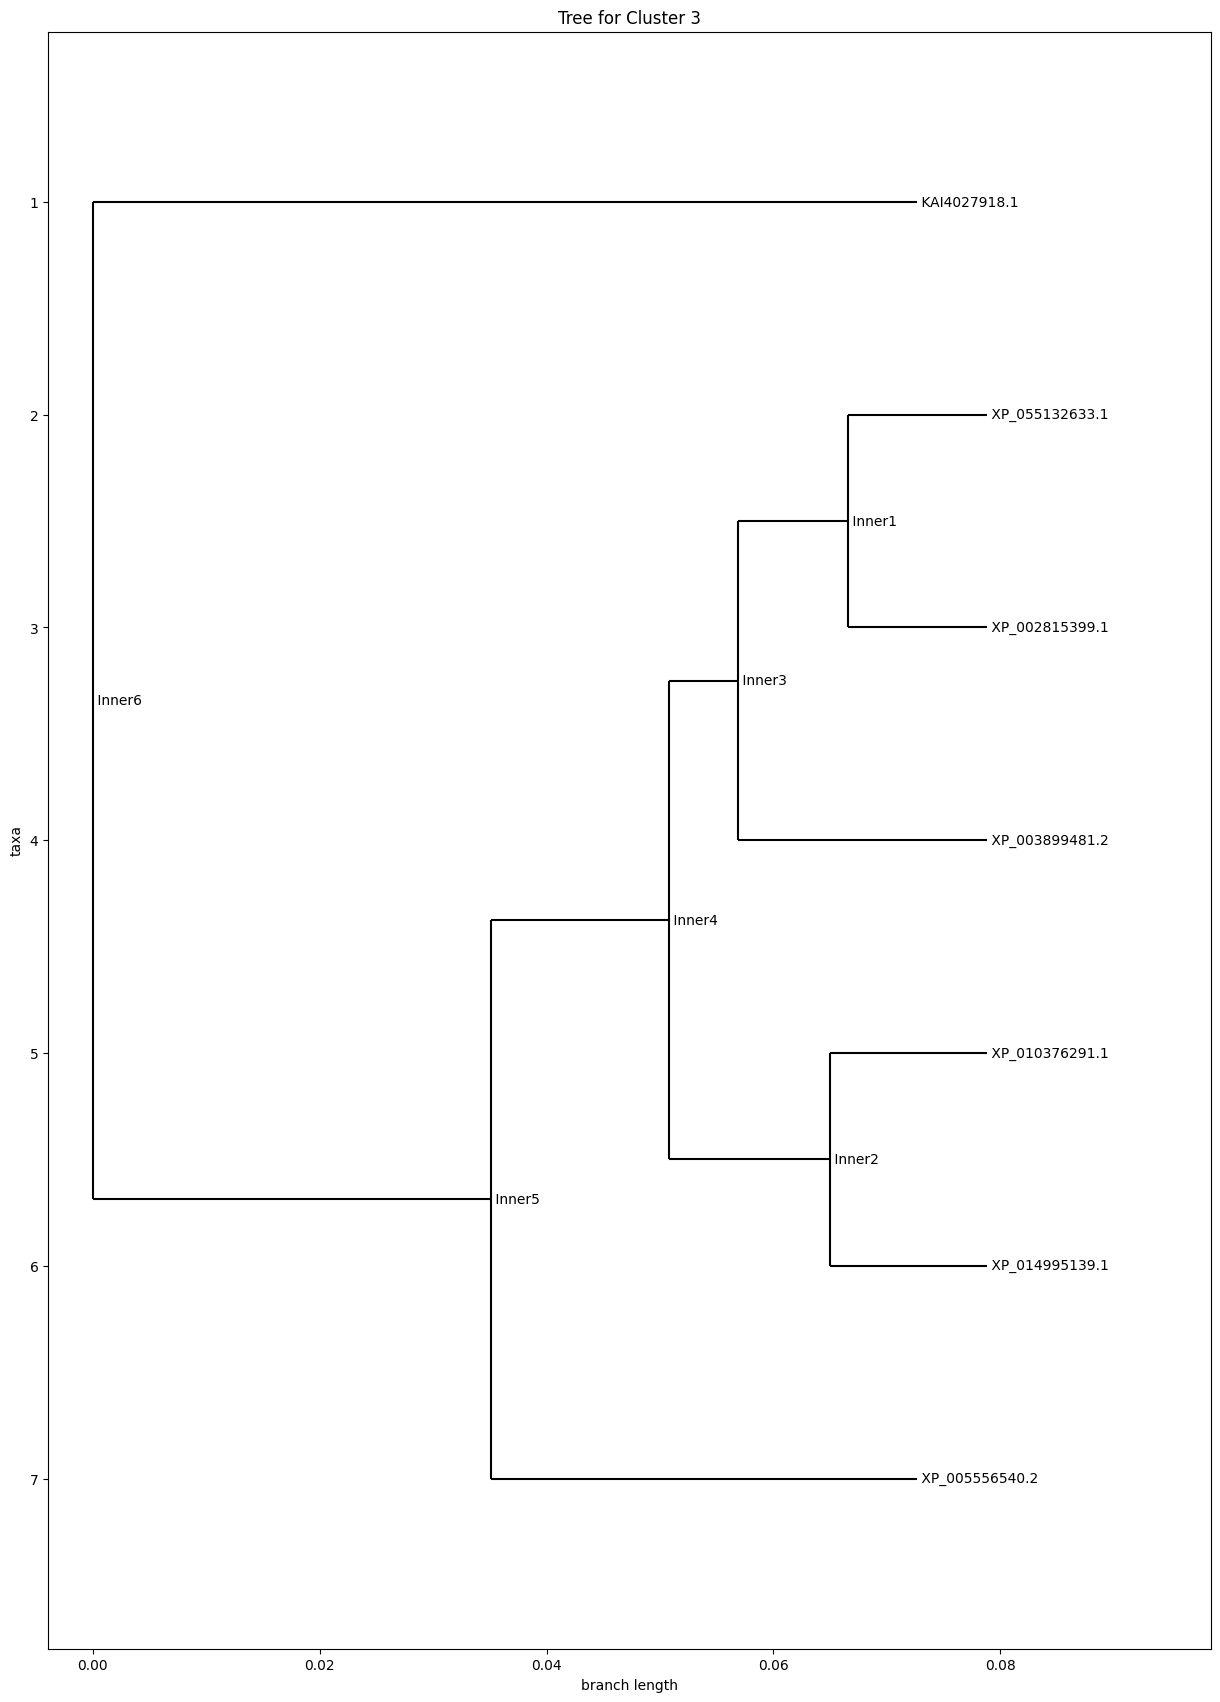

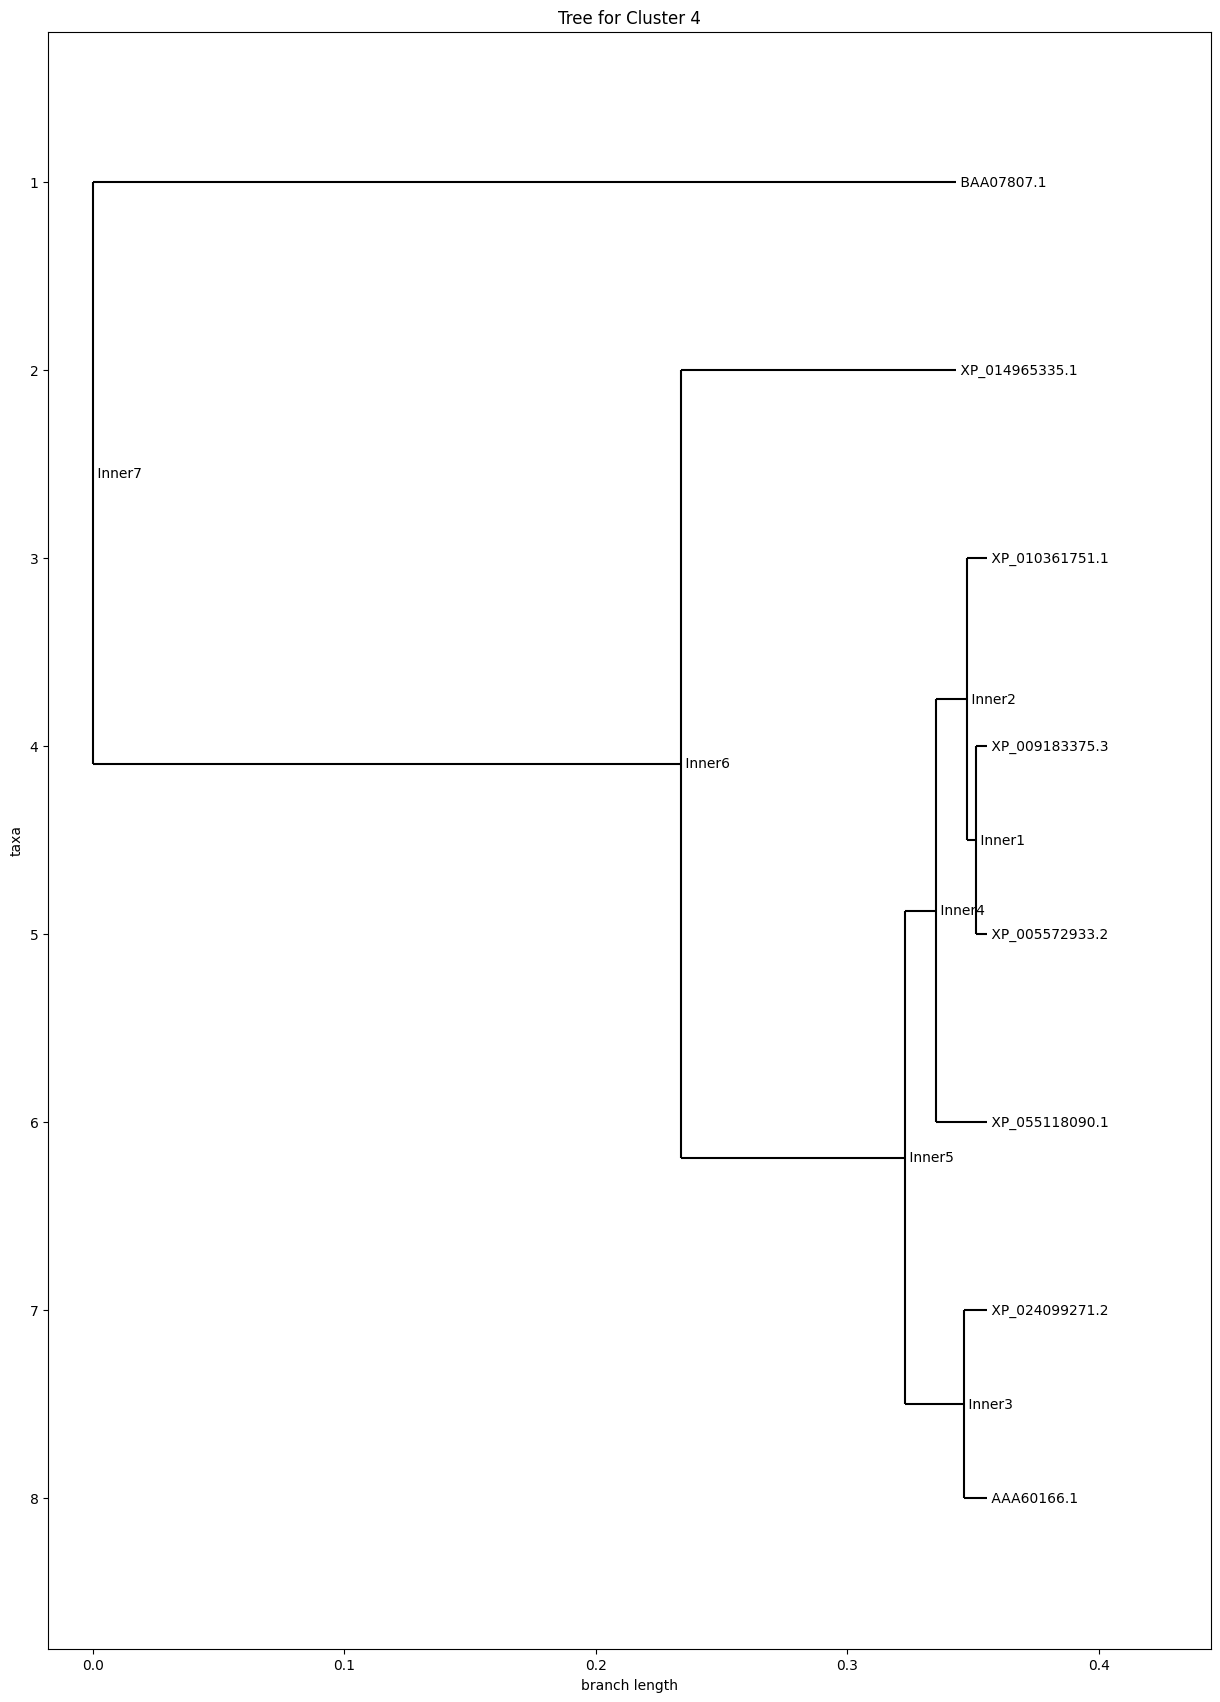

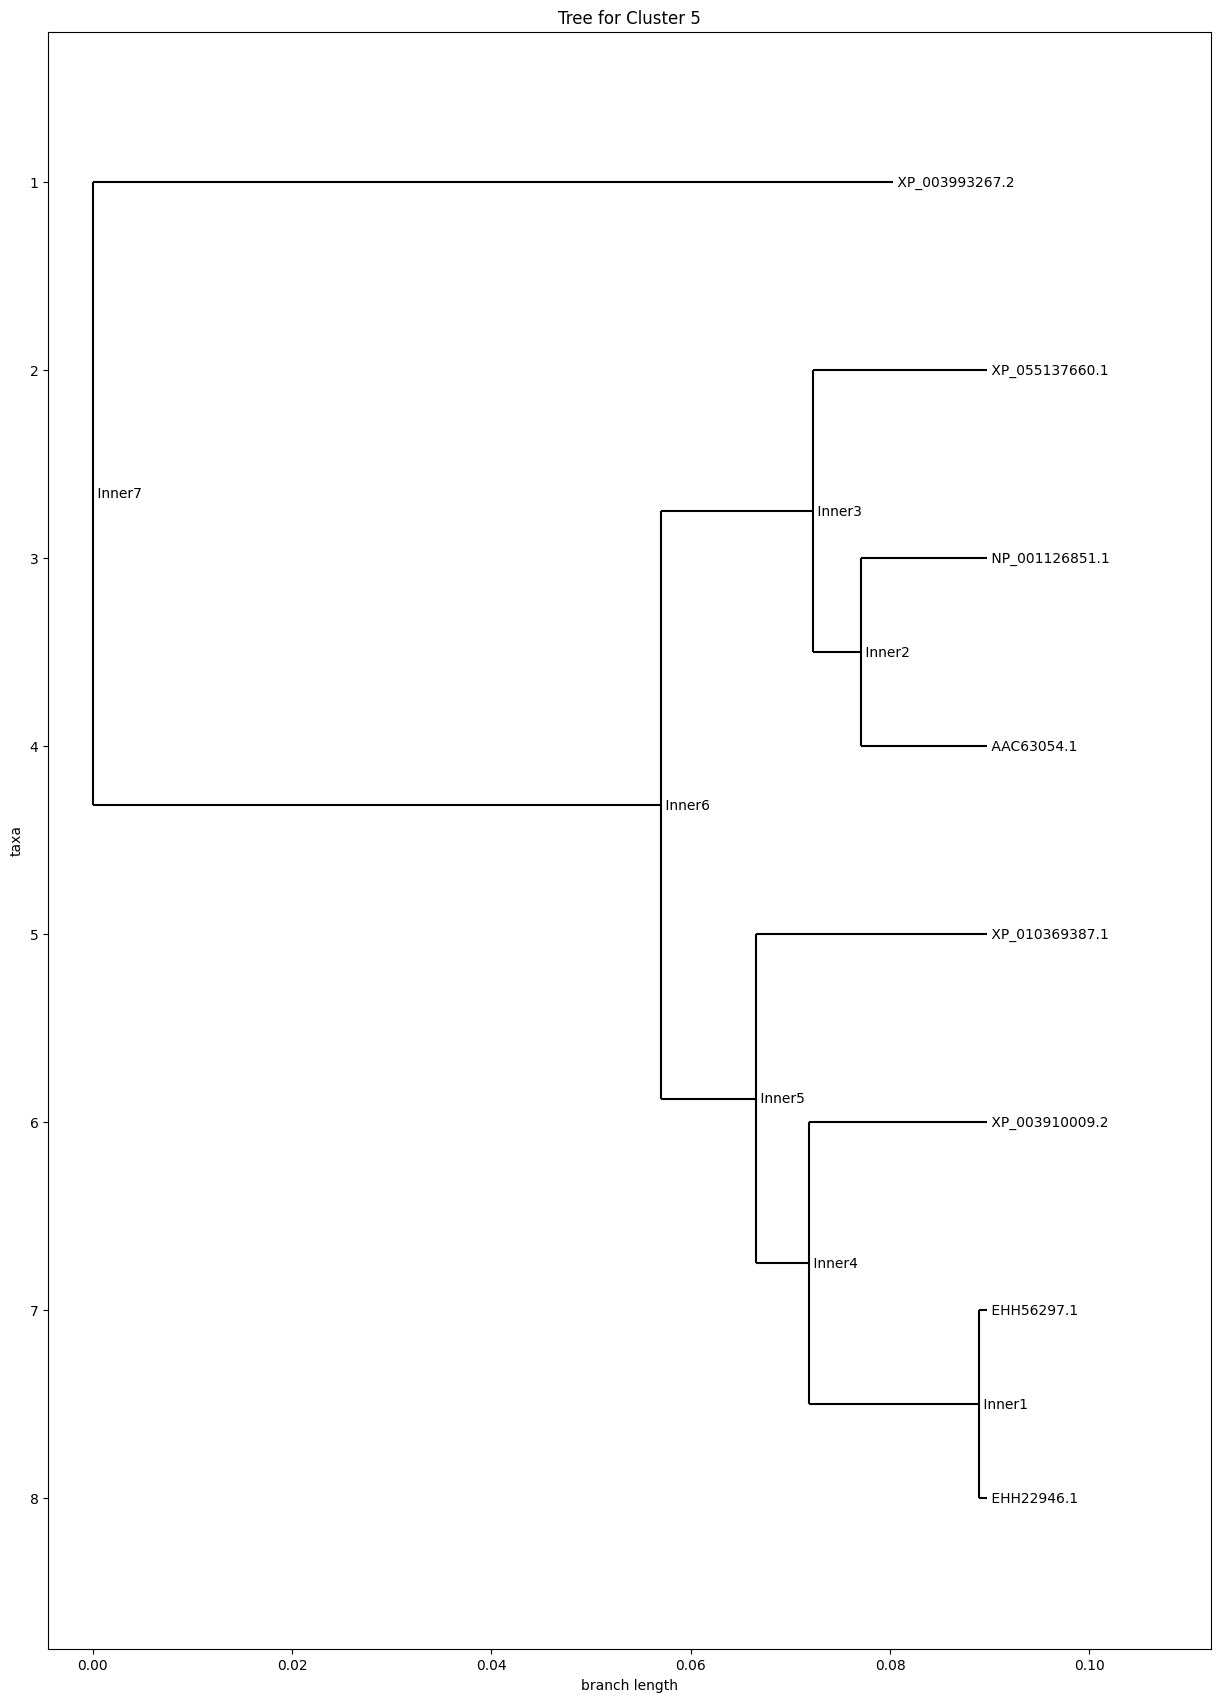

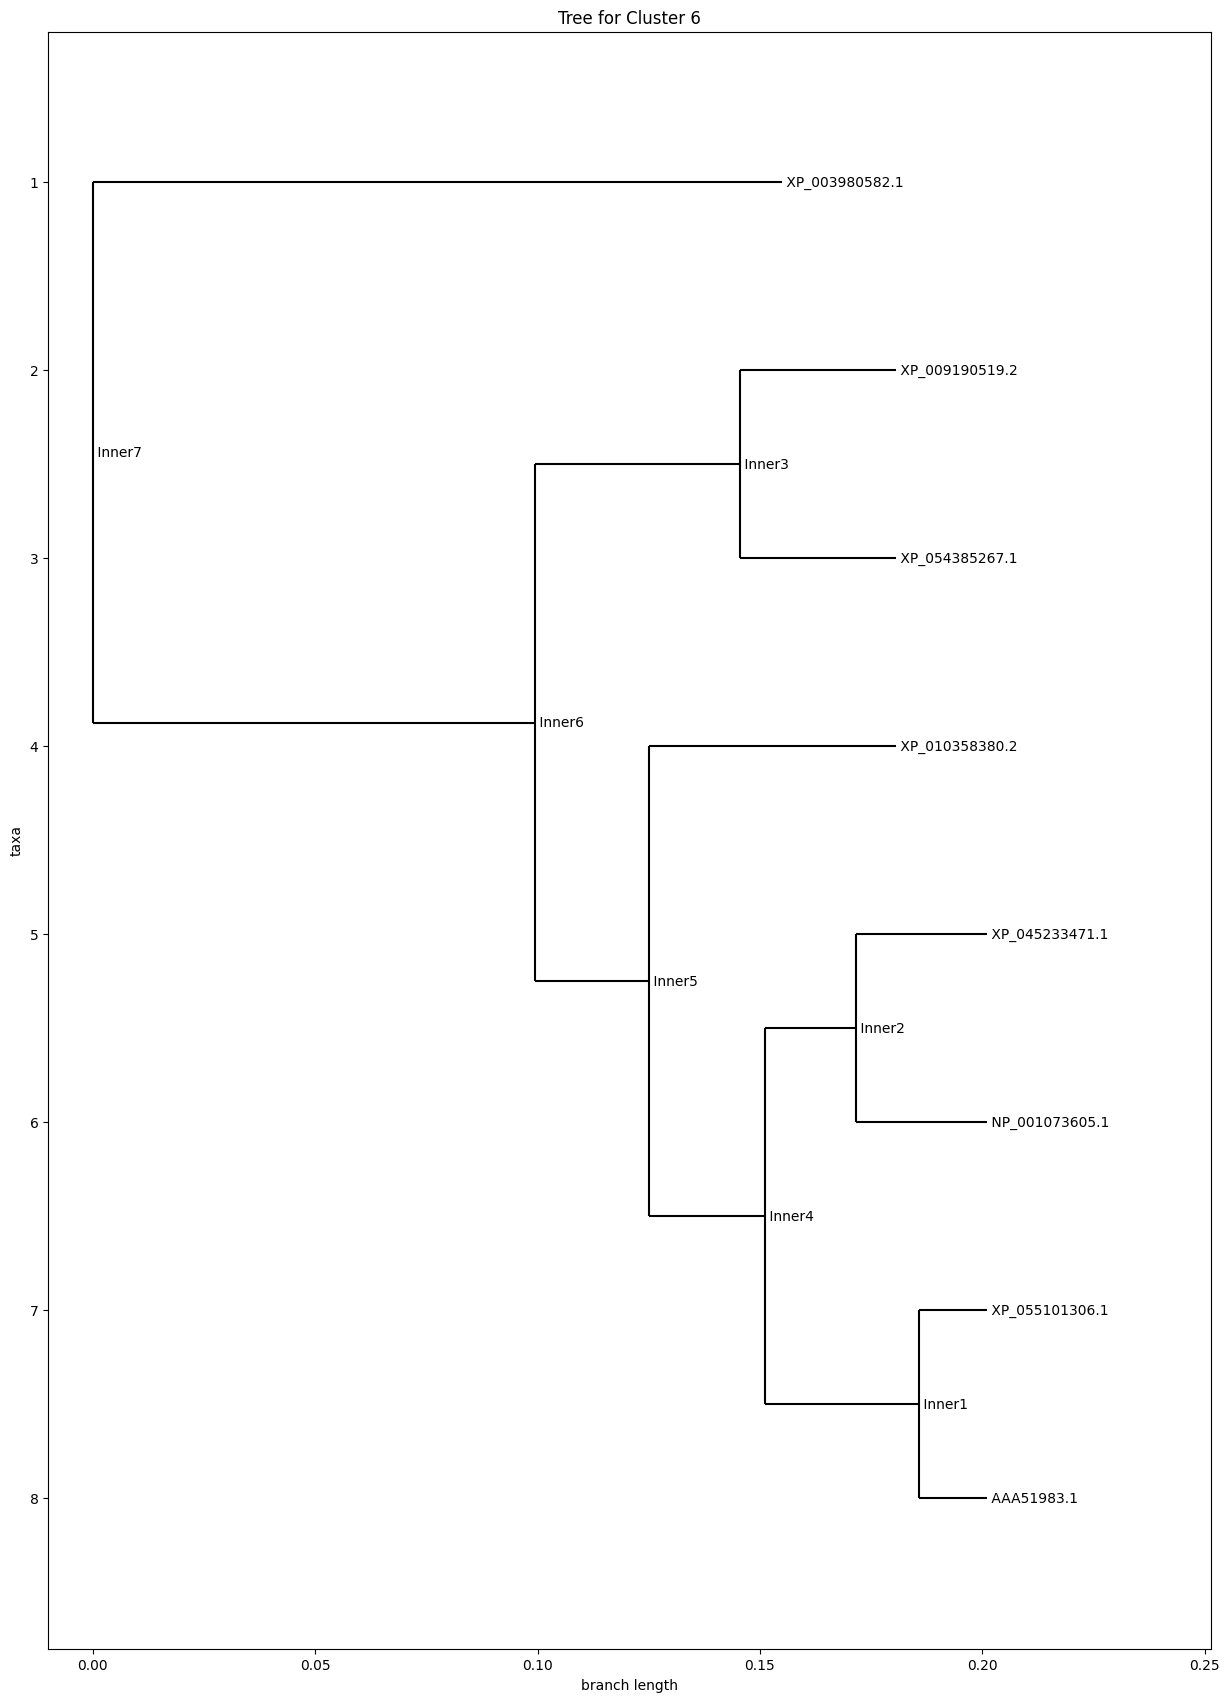

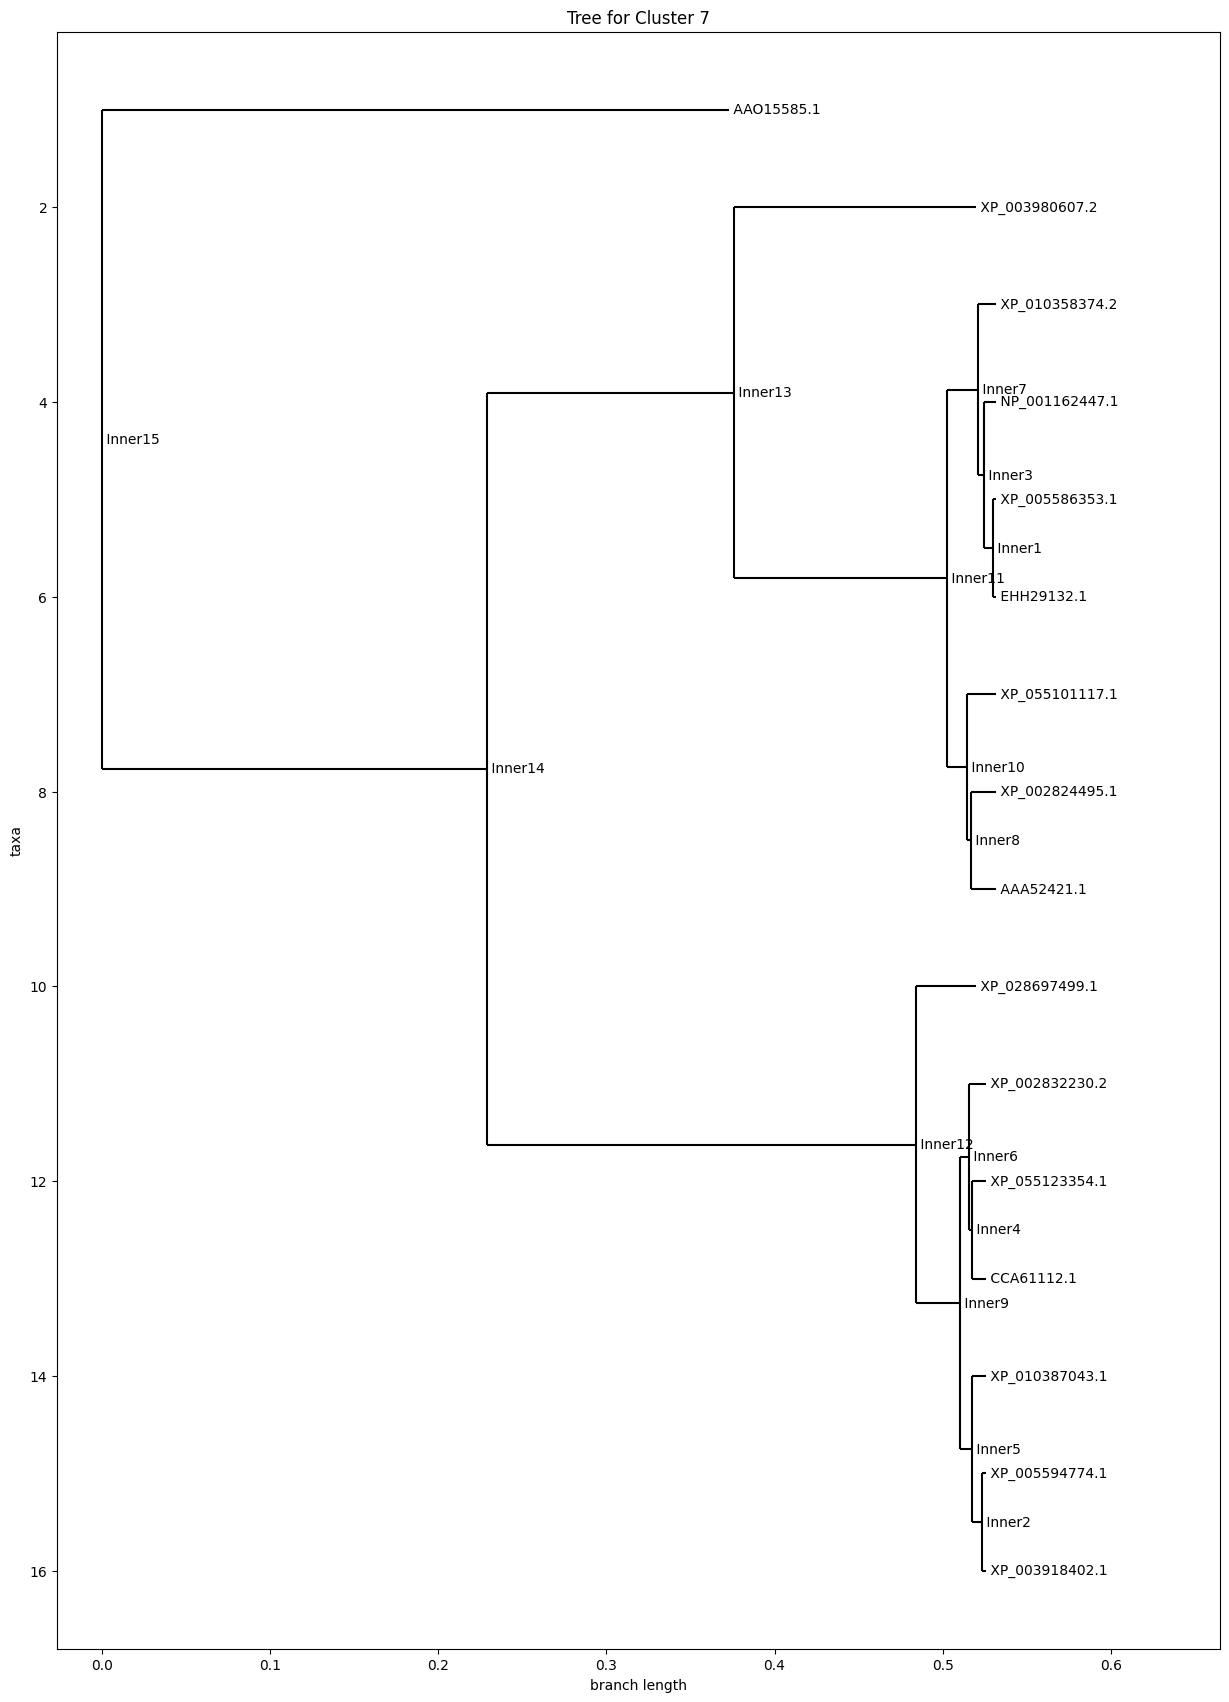

In [44]:
for i, tree in enumerate(cluster_trees, start=1):
    fig, ax = plt.subplots(figsize=(15, 21))
    Phylo.draw(tree, axes=ax, do_show=False)
    plt.title(f'Tree for Cluster {i}')
    filename = f'tree_cluster_{i}.png'
    plt.savefig(filename)
    plt.show()
    plt.close()

In [45]:
#a III

def read_your_align(alignment_output):

    # Read the aligned sequences
    aligned_records = list(SeqIO.parse(alignment_output, "clustal"))

    # Construct a MultipleSeqAlignment object
    alignment = MultipleSeqAlignment([SeqRecord(Seq(str(record.seq)), id=record.id, description="") for record in aligned_records])

    return alignment

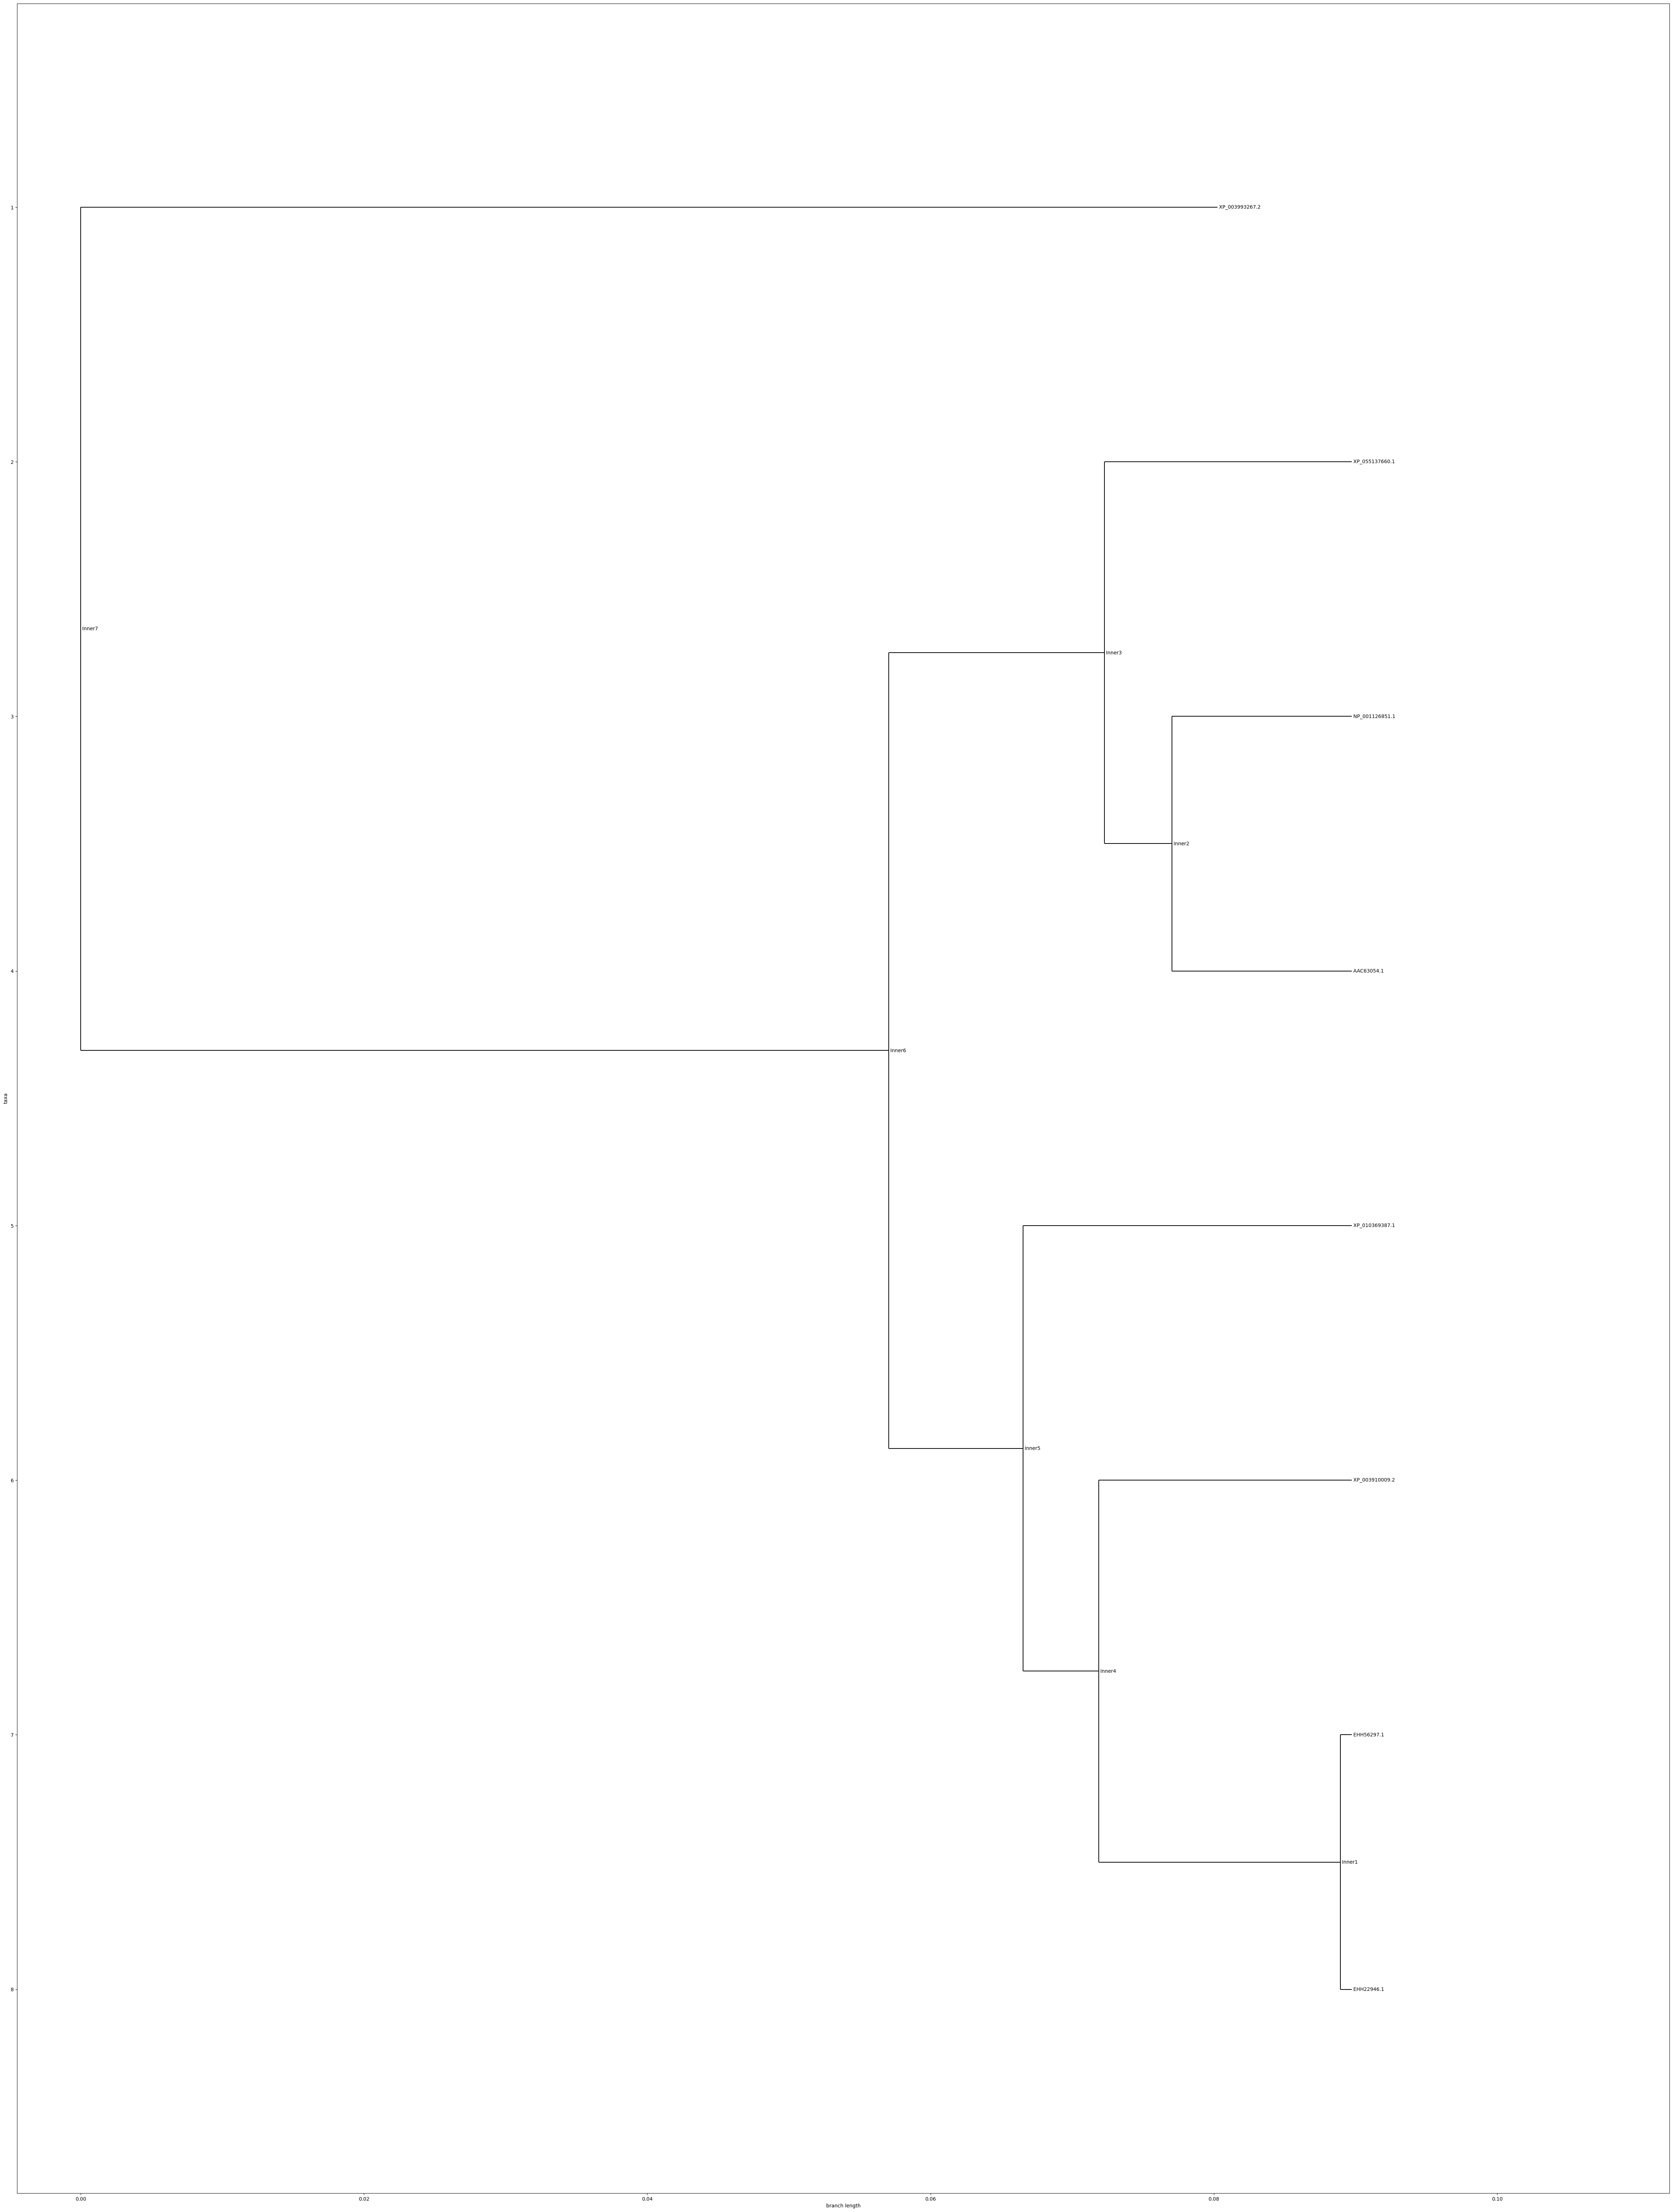

In [46]:
# Ex. 2 (a) iii.

constructor = DistanceTreeConstructor()
tree = constructor.upgma(distance_matrix)

# Draw the tree with simplified axes
fig, ax = plt.subplots(figsize=(60, 80))
#ax.axis('off')
Phylo.draw(tree, axes=ax, do_show=False)
plt.savefig('tree_plott2.png', dpi=400)
plt.show()


<Figure size 1000x700 with 0 Axes>

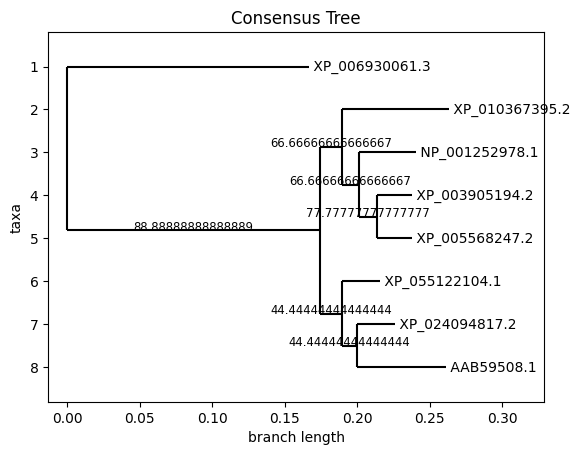

In [47]:
# 2b

# Consensus tree for separate tree for each "group" of protein
group_consensus = majority_consensus(group_trees)


plt.figure(figsize=(10, 7))
Phylo.draw(group_consensus, do_show=False)
plt.title(f'Consensus Tree')
plt.show()

<Figure size 1000x700 with 0 Axes>

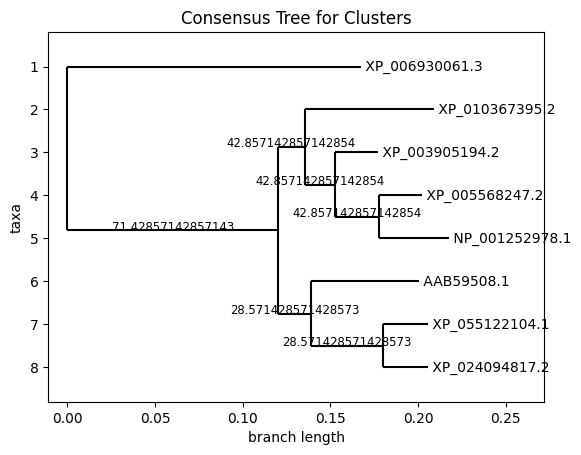

In [48]:
# Consensus tree for separate tree for each "group" of protein
group_consensus = majority_consensus(cluster_trees)


plt.figure(figsize=(10, 7))
Phylo.draw(group_consensus, do_show=False)
plt.title(f'Consensus Tree for Clusters')
plt.show()

In [52]:
ids = data_all["id"]
orgs = data_all["organism"]
prots = data_all["protein"]

In [53]:
id_dict = {}
for i in range(len(ids)):
  id_dict[ids[i]] = [orgs[i],prots[i]]

id_dict['BAA07807.1'] = ['F. catus', 'protein C']
id_dict['BAX39000.1'] = ['F. catus', 'factor XII']
id_dict['NP_001126851.1'] = ['P. abelii', 'prothrombin']
id_dict['XP_002824495.1'] = ['P. abelii', 'factor X']
id_dict['XP_055101306.1'] = ['S. syndactylus', 'factor VII']

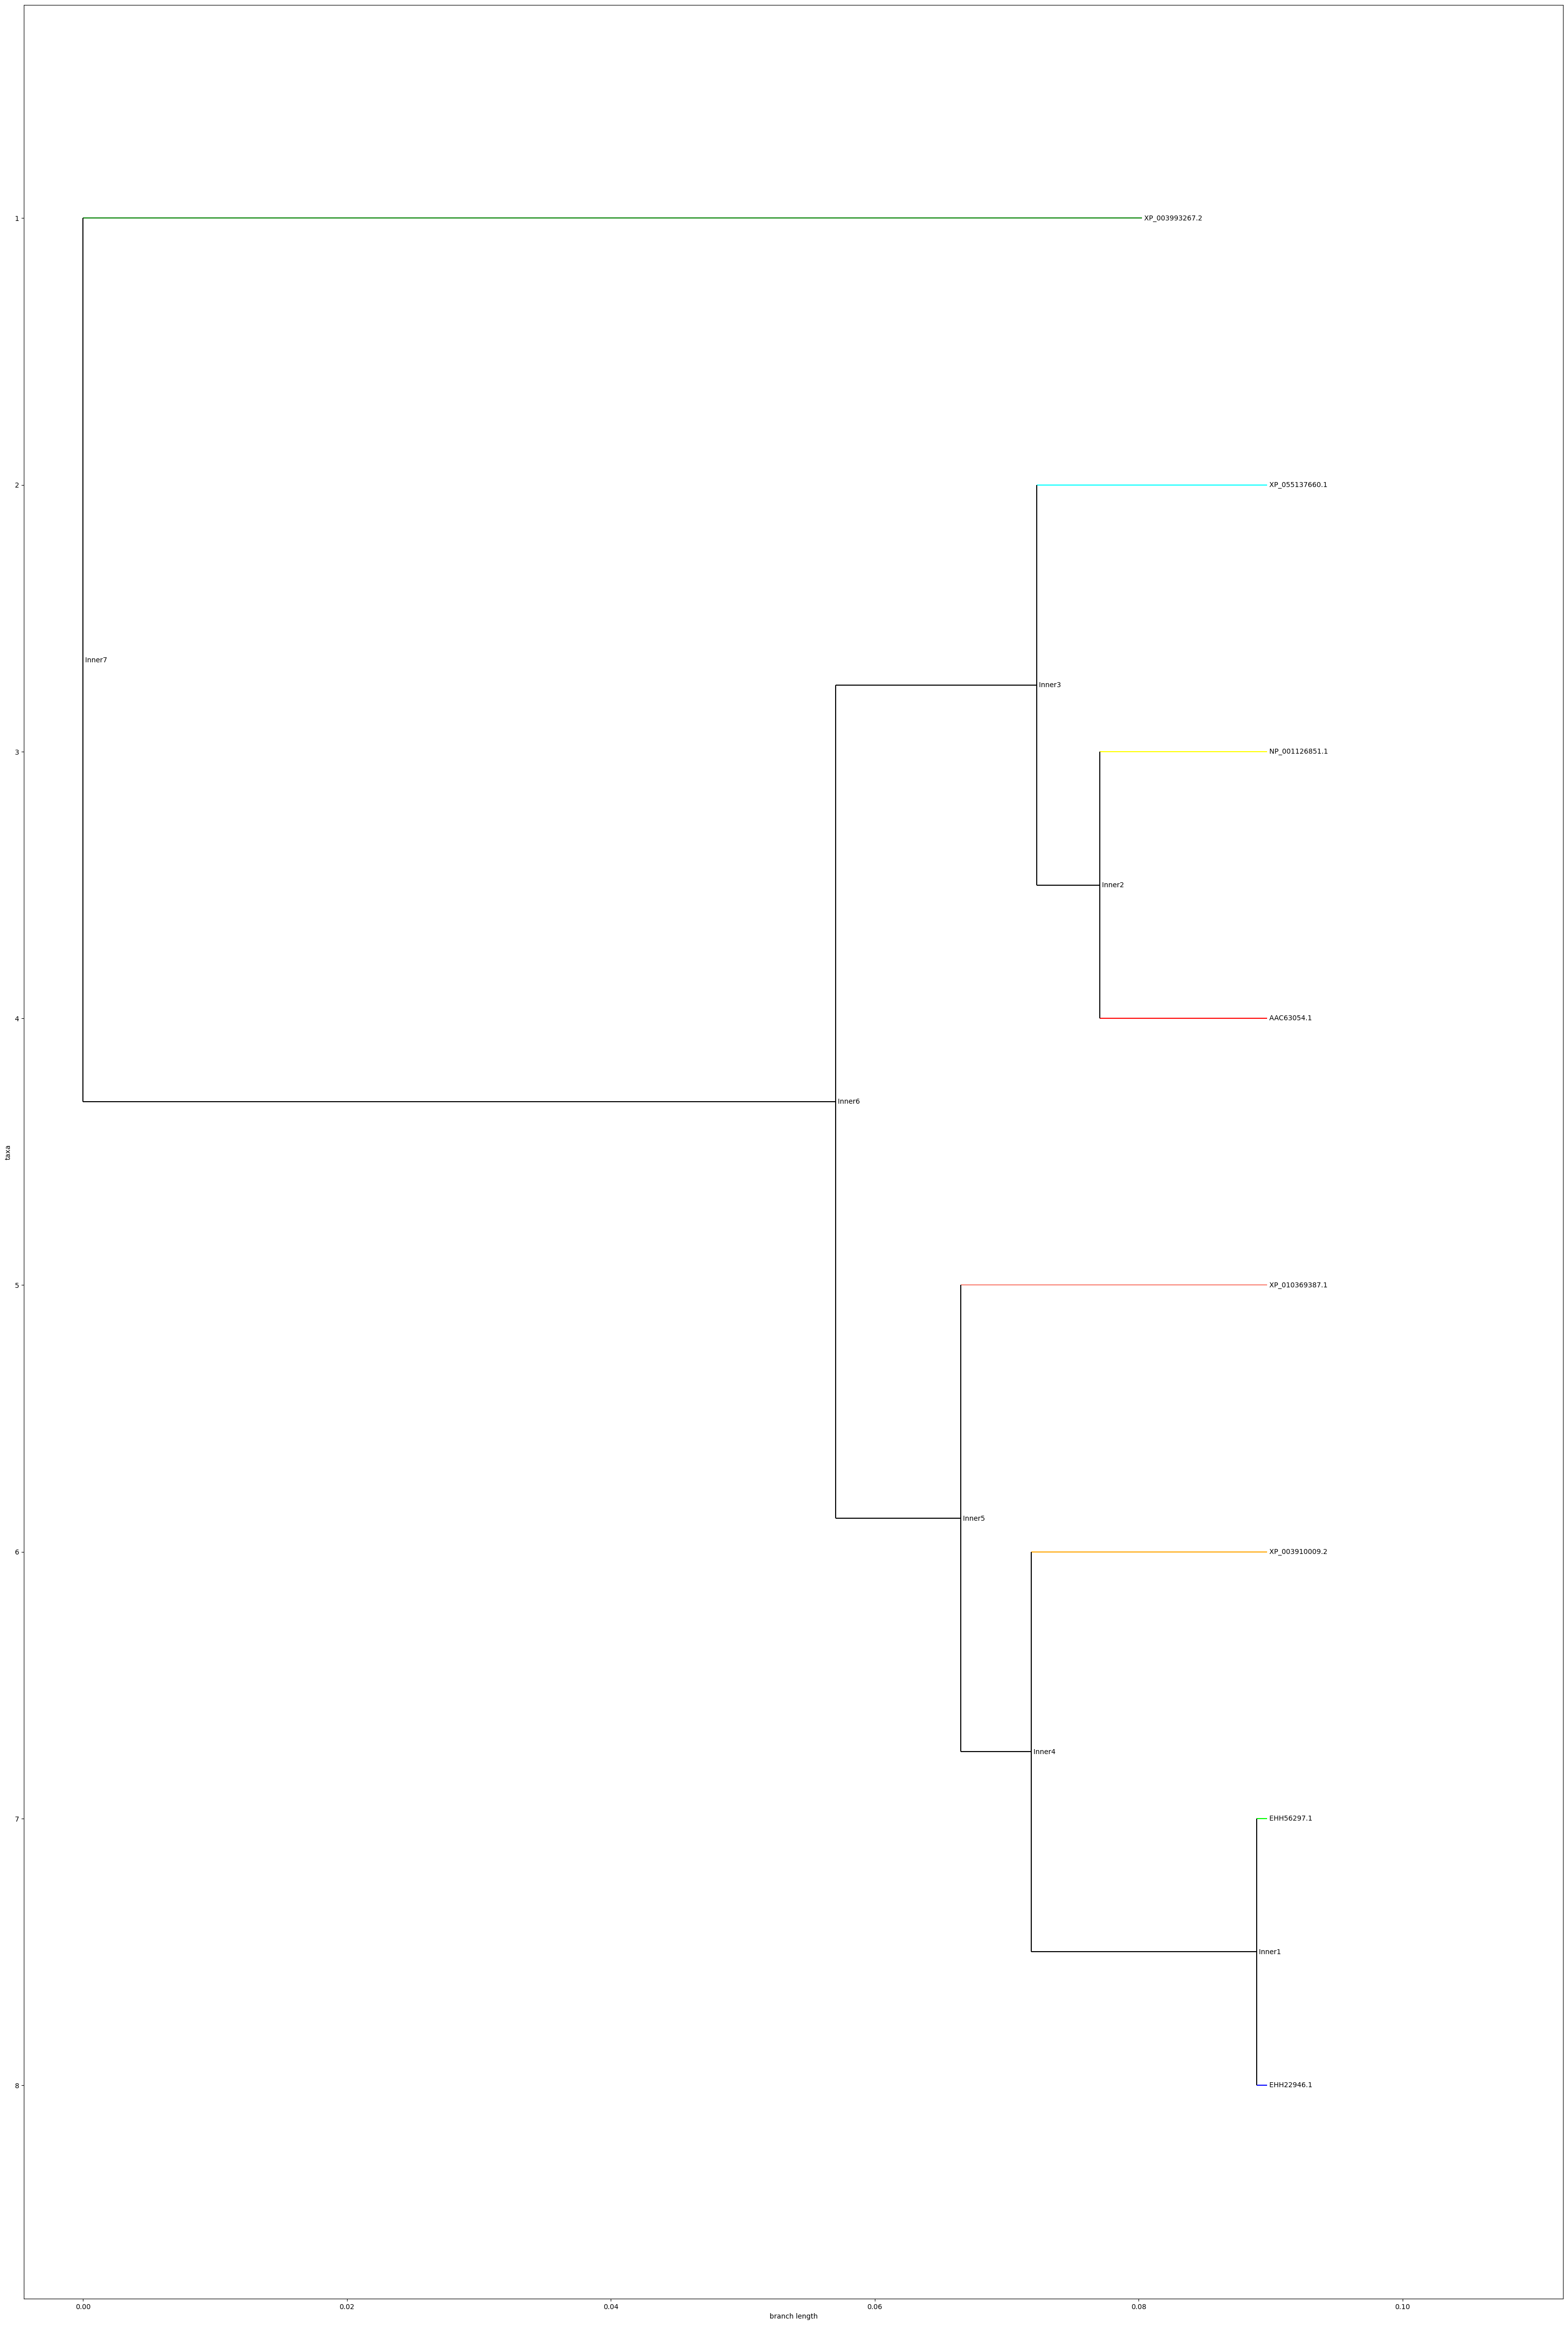

In [55]:
# Ex. 2. (c) i.

tree_org = constructor.upgma(distance_matrix)
fig, ax = plt.subplots(figsize=(40, 60))

organism_colors = {
    'H. sapiens': 'red',
    'F. catus': 'green',
    'M. mulatta': 'blue',
    'M. fascicularis': 'lime',
    'P. abelii': 'yellow',
    'P. anubis': 'orange',
    'R. roxellana': 'salmon',
    'S. syndactylus': 'aqua'
}

# clades settimgs
for clade in tree_org.find_clades():
  if clade.name[0:5] != "Inner":
    for organism, color in organism_colors.items():
        if organism in id_dict[clade.name]:
            clade.color = color

Phylo.draw(tree_org, axes=ax, do_show=False)

plt.show()

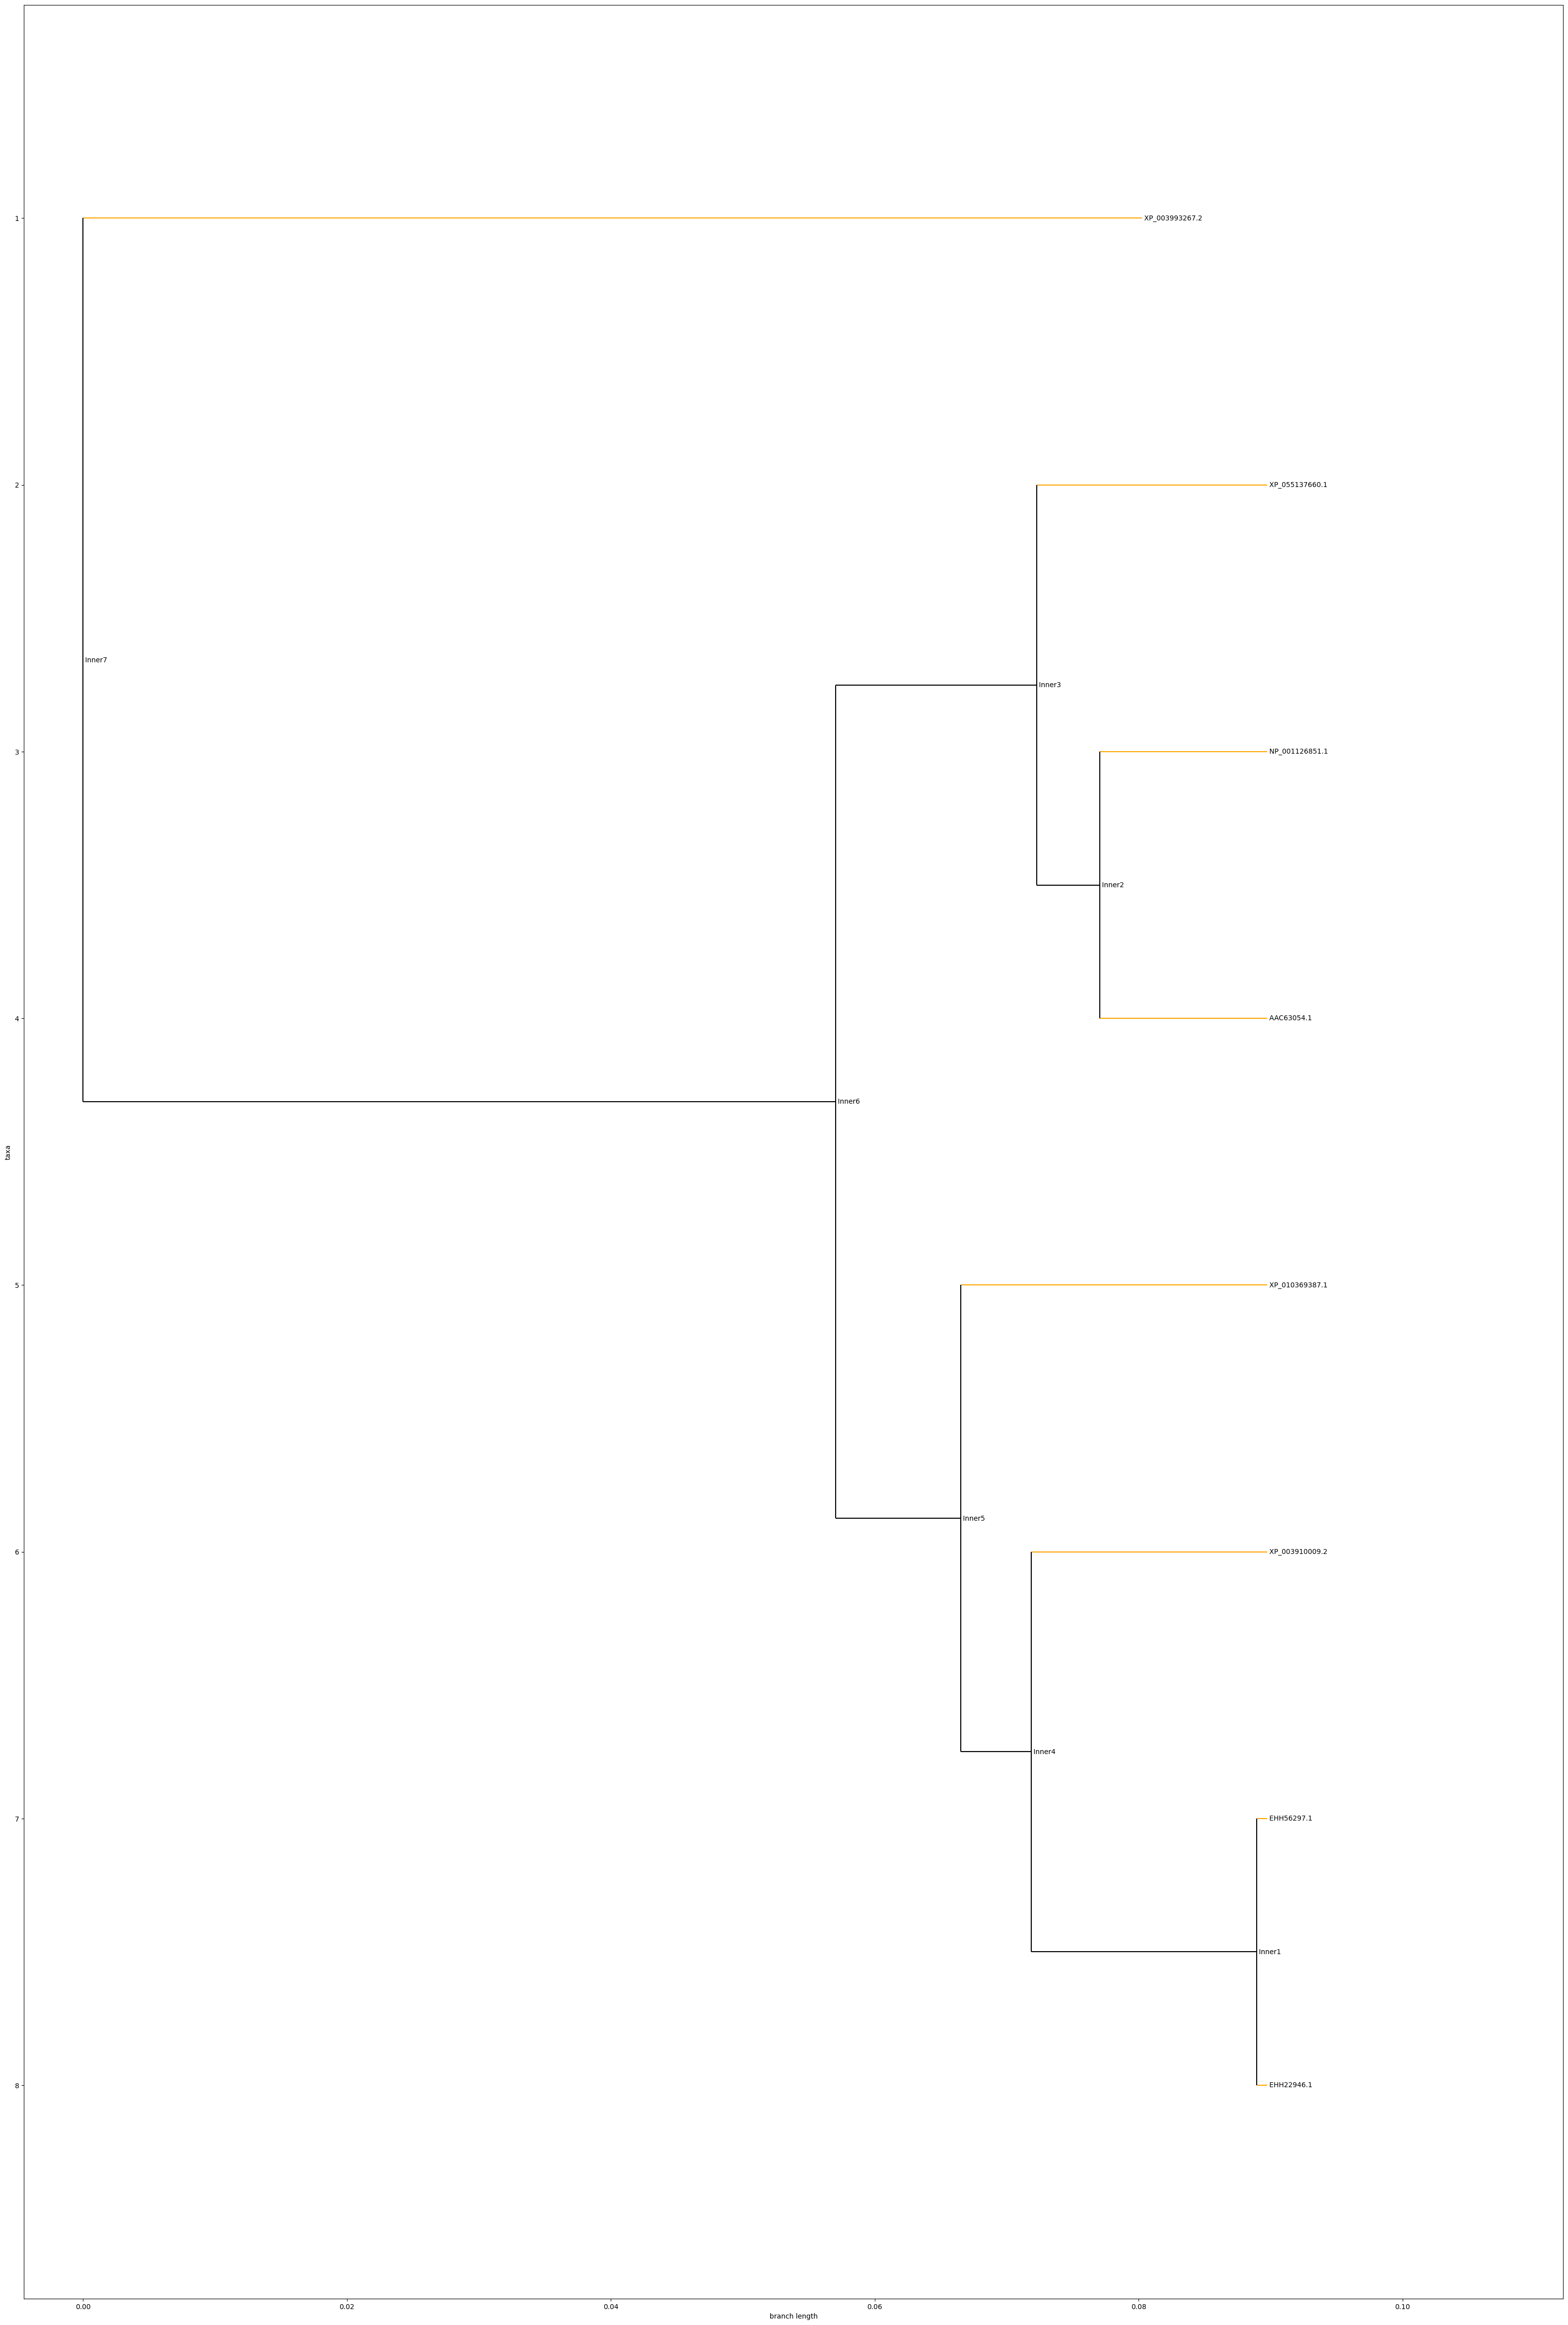

In [56]:
# Ex. 2. (c) ii.

# Branch coloring

tree_prot = constructor.upgma(distance_matrix)
fig, ax = plt.subplots(figsize=(40, 60))

protein_colors = {
    'factor VII': 'red',
    'factor X': 'green',
    'protein C': 'blue',
    'factor XII': 'lime',
    'factor IX': 'yellow',
    'prothrombin': 'orange',
    'thrombomodulin': 'salmon',
    'factor XI': 'aqua'
}

for clade in tree_prot.find_clades():
  if clade.name[0:5] != "Inner":
    for protein, color in protein_colors.items():
        if protein in id_dict[clade.name]:
            clade.color = color

Phylo.draw(tree_prot, axes=ax, do_show=False)

plt.show()

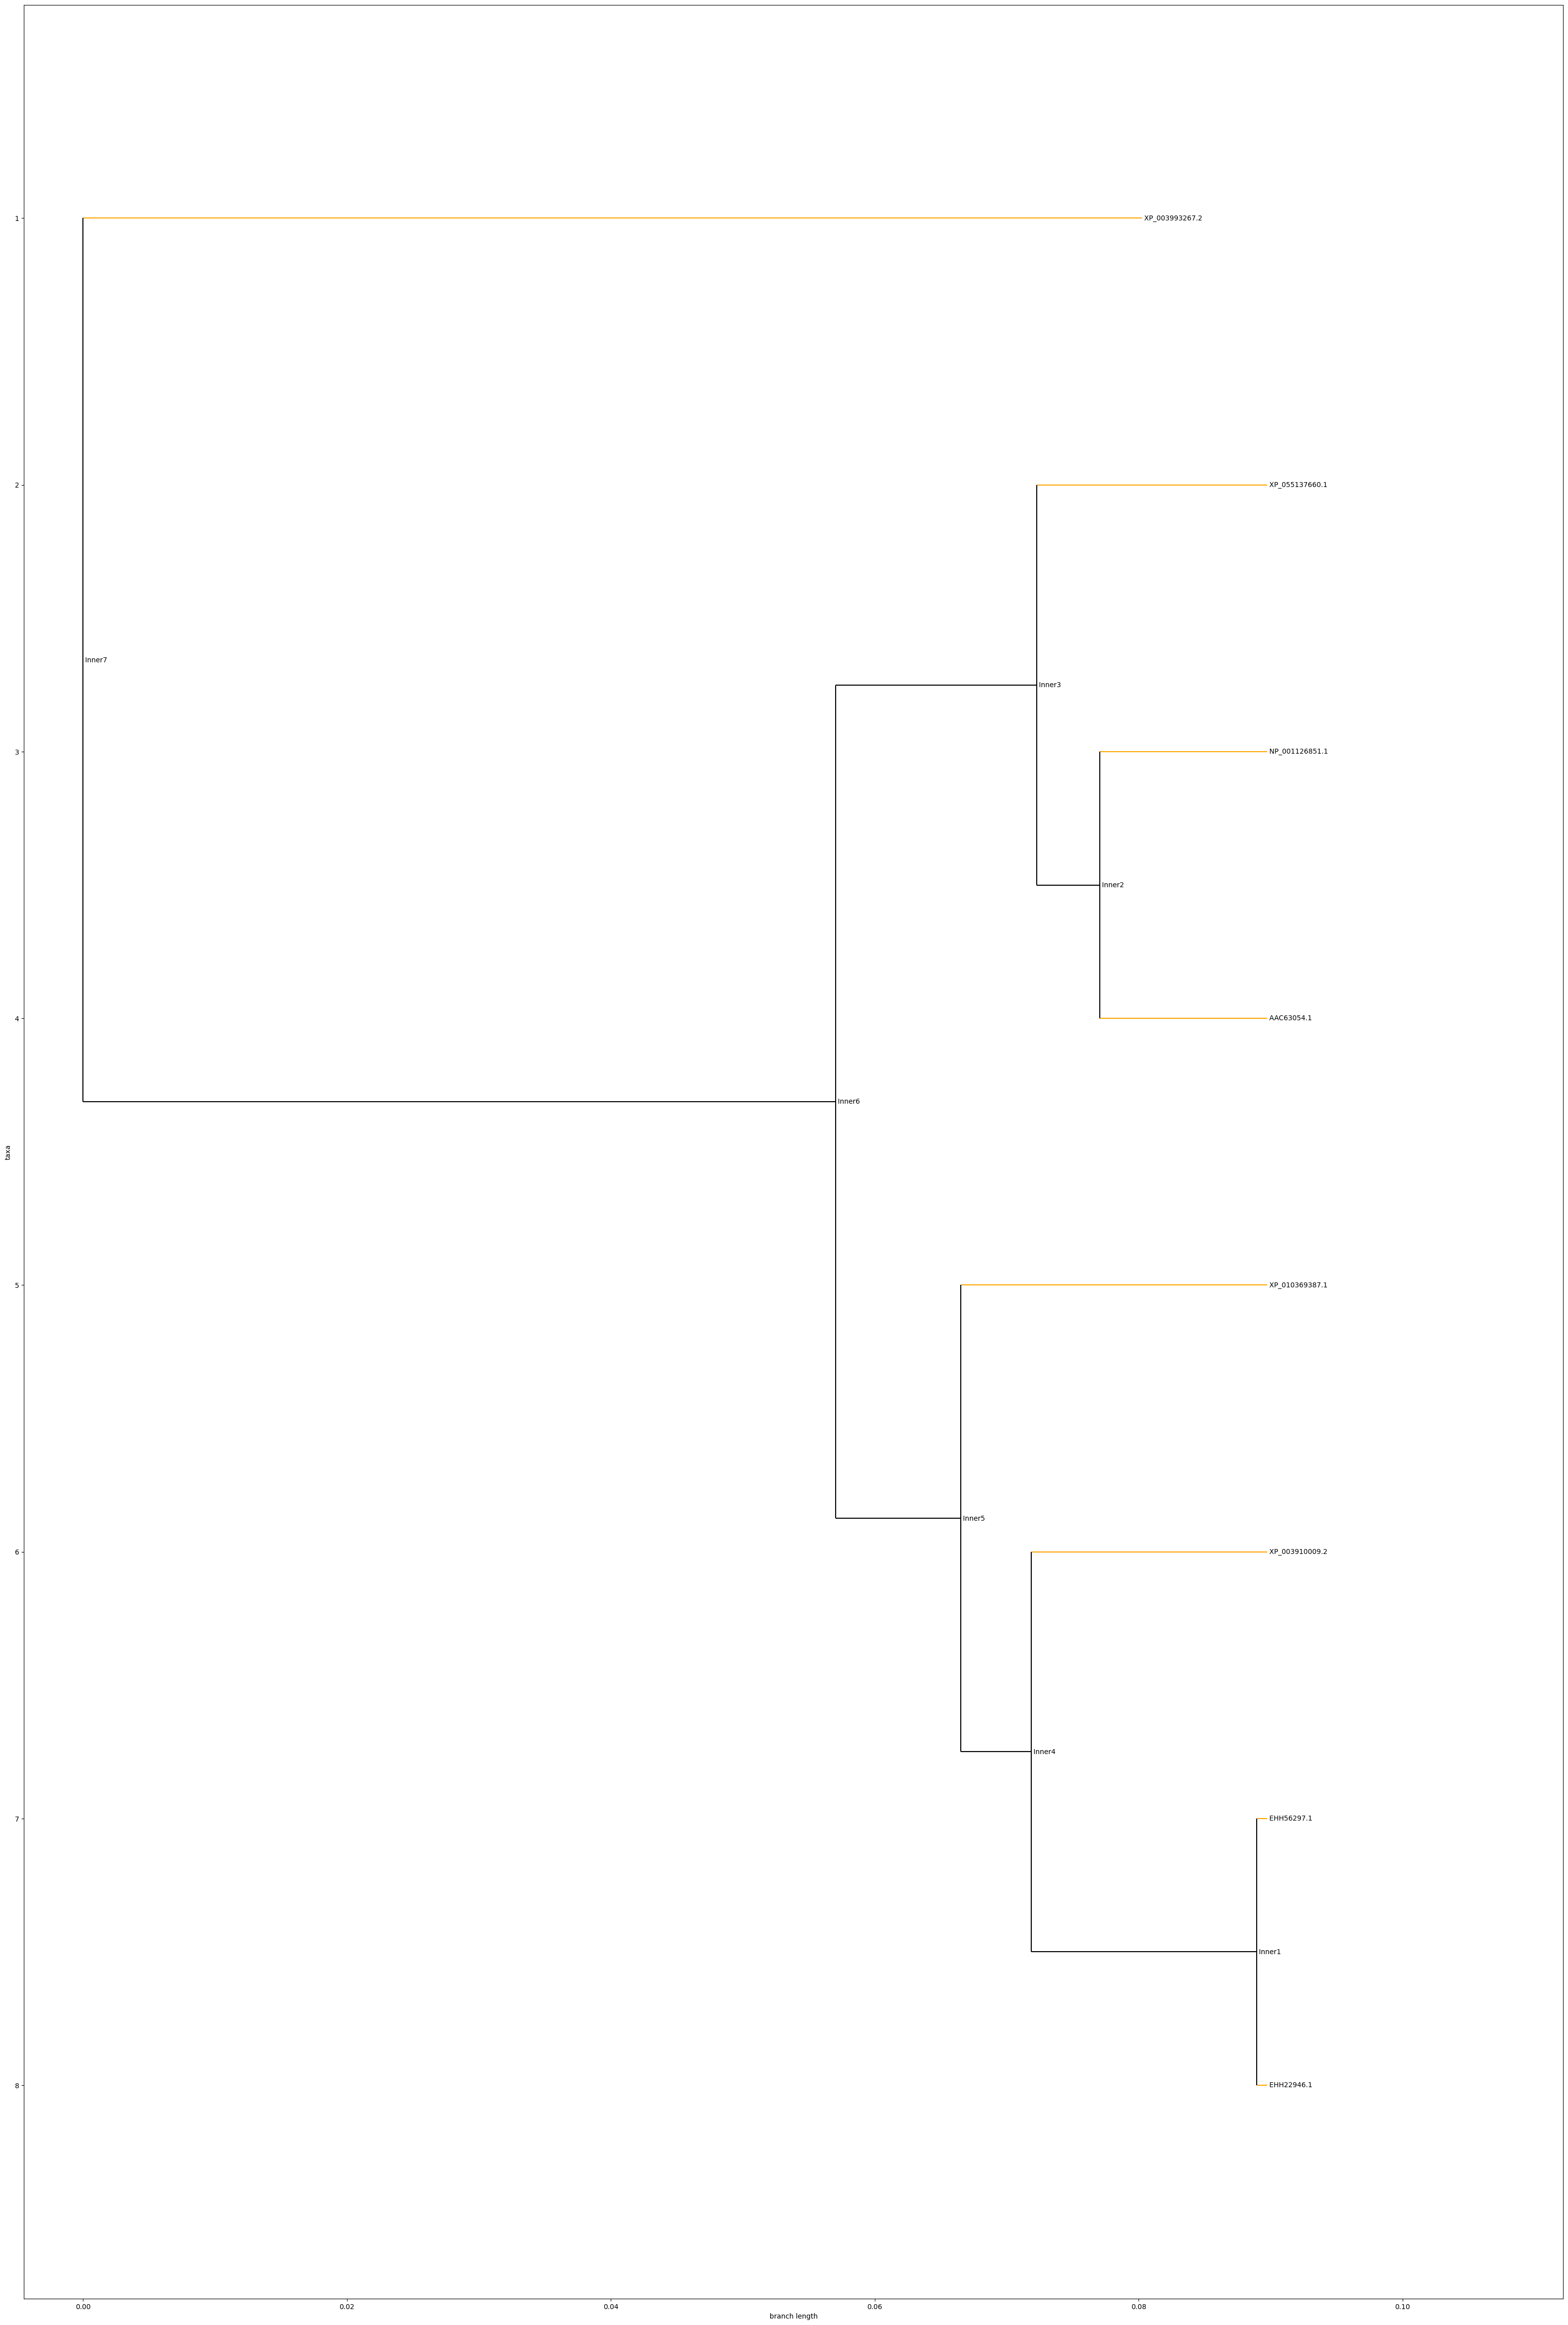

In [57]:
# Ex. 2. (c) ii.

# Monochromatic clade coloring -> Inner54 -> not monochromatic

def color_a_clade(tree, clade_name, color):
    clade = next((clade for clade in tree.find_clades() if clade.name == clade_name), None)
    if clade:
        clade.color = color

color_a_clade(tree_prot, "Inner55", "salmon")
color_a_clade(tree_prot, "Inner47", "orange")
color_a_clade(tree_prot, "Inner52", "lime")
color_a_clade(tree_prot, "Inner53", "red")
color_a_clade(tree_prot, "Inner51", "green")
color_a_clade(tree_prot, "Inner35", "yellow")
color_a_clade(tree_prot, "Inner50", "blue")
color_a_clade(tree_prot, "Inner45", "aqua")

fig, ax = plt.subplots(figsize=(40, 60))
Phylo.draw(tree_prot, axes=ax, do_show=False)
plt.show()